## Data Update for 2024-05-13 export - Cleaning the Data

In [1]:
# Import
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import datetime, os
from cartopy import crs as ccrs
from cartopy import feature as cfeature
import seaborn as sns
from tabulate import tabulate
import sys
from matplotlib.colors import Normalize

pd.options.display.max_columns = 50

print("Last updated on {}".format(datetime.datetime.now().ctime()))

DATA_FP = "/home/livia.steinfreitas/whaling_project/data"

Last updated on Wed Jun 12 15:50:43 2024


### Import Data

In [2]:
# labels corresponding to missing data
na_values = [
    "No observation",
    "No observations",
    "No Observation",
    "No Observations",
    "no observation",
    "no observations",
    "None given",
    "none given",
    "None Given",
    "none",
    "none recorded",
    "not recorded",
    "None recorded",
    "Not given",
    "not given",
    " ",
]

# read CSV file into DataFrame
df = pd.read_csv(
    f"{DATA_FP}/logentries-export-2024-05-13.csv",
    parse_dates={"DateTime": [3, 4]},
    na_values=na_values,
)

/tmp/ipykernel_534419/3326655003.py:22: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df = pd.read_csv(


Enter true in "wind force" column if "Wind Speed/Force" column is NaN but one of {2. Wind/Speed..., 3. Wind/Speed} is not.

In [3]:
# Finding how many times there is a wind force value in the second or third
# observation but not first

df["wind force"] = df["Wind Speed/Force"].isna() & (
    df["2. Wind Speed/Force"].notna() | df["3. Wind Speed/Force"].notna()
)
df_wf = df[df["wind force"] == True]
df_wf.head()

,DateTime,ID,LogBook ID,Page,Latitude,Longitude,Depth,Depth Unit,Bottom,Current,Landmark,Ship Heading/Course,Wind Direction,Wind Speed/Force,Sea State,Cloud Cover,Weather,2. Ship Heading/Course,2. Wind Direction,2. Wind Speed/Force,2. Sea State,2. Cloud Cover,2. Weather,3. Ship Heading,3. Wind Direction,3. Wind Speed/Force,3. Sea State,3. Cloud Cover,3. Weather,Ship Sightings,Instrumental Observations,Miscellaneous Observations,wind force
66,1852-12-20 12:00:00,99759,Greyhound (Bark) 1851-1853,NaN,35 27 S,50 45 W,NaN,NaN,NaN,NaN,NaN,SSE / By the Wind,E,NaN,Rugged,Cloudy,Thick,NE by N / By the Wind,NaN,More Moderate,Rugged,NaN,NaN,NaN,NaN,More Moderate,NaN,NaN,Fair,NaN,At 6PM barometer reads 29.5 Hg\r At 6AM barome...,NaN,True
90,1839-02-22 12:00:00,99735,Gideon Howland (Ship) 1838-1842,15,NaN,NaN,NaN,NaN,NaN,NaN,Last coordinate noted was 38 10 S 19 34 E from...,NaN,SW,NaN,NaN,Cloudy,Moderate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,E,Wind,NaN,NaN,NaN,NaN,NaN,NaN,True
182,1852-10-29 12:00:00,99641,Greyhound (Bark) 1851-1853,NaN,15 05 N,25 00 W,NaN,NaN,NaN,NaN,NaN,Lying Of and On São Vicente,NaN,NaN,NaN,NaN,Thick and Rainy,S,NE,Fine Breezes,NaN,Cloudy and Smoky,NaN,SSW,NaN,Fresh Breezes,NaN,Cloudy and Smoky,NaN,The Thomas Winslow,At 6PM barometer reads 29.525 Hg\r At 6AM baro...,At 7AM ship steering by E,True
185,1852-10-26 12:00:00,99638,Greyhound (Bark) 1851-1853,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Lying Of and On São Vicente,NE,NaN,NaN,NaN,Thick and Rainy,NaN,NaN,Light Winds and Calms,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fine,The Calcutta,At 6PM barometer reads 29.575 Hg\r At 6AM baro...,NaN,True
343,1852-08-25 12:00:00,99479,Greyhound (Bark) 1851-1853,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fayal,For Fayal,NaN,NaN,Smooth,NaN,Calm and Pleasant,NaN,N and E,Light Breezes,NaN,NaN,NaN,NaN,From All Points of the Compass,Light Winds and Calms,NaN,NaN,Thick and Rainy,NaN,At 6PM barometer is at 29.95 Hg\r At 6AM barom...,NaN,True


In [4]:
# Dropping columns not needed
columns_to_drop = [
    "Current",
    "2. Ship Heading/Course",
    "2. Wind Direction",
    "2. Wind Speed/Force",
    "2. Sea State",
    "2. Cloud Cover",
    "2. Weather",
    "3. Ship Heading",
    "3. Wind Direction",
    "3. Wind Speed/Force",
    "3. Sea State",
    "3. Cloud Cover",
    "3. Weather",
    "Instrumental Observations",
]

# Drop the specified columns
df.drop(columns=columns_to_drop, inplace=True)

In [32]:
# Setting up a folder system
# Create folders called "Figures", "Text_Files", and "CSV Files" manually to save everything to

# Get current directory
test_directory = f"{DATA_FP}/test"

# Specify the path to the folder
Figures = os.path.join(test_directory, "Figures")
Files = os.path.join(test_directory, "Text_Files")
CSV = os.path.join(test_directory, "CSV_Files")

# Cleaning Data

Dropping 'TEST LOG BOOK NAME' Entries

In [6]:
df.drop(df.loc[df["LogBook ID"] == "TEST LOG BOOK NAME"].index, axis=0, inplace=True)

Dropping 'Westward-1978' Entries

In [7]:
# df.drop(df.loc[df["Entry Date Time"].dt.year==2021.].index,axis=0,inplace=True)
df.drop(df.loc[df["LogBook ID"] == "Westward-1978"].index, inplace=True)
df.drop(df.loc[df["LogBook ID"] == "55"].index, inplace=True)

Manual Cleanups

In [8]:
# replace DateTime-strings that end with ' nan' with np.nan
# df.DateTime.str.endswith(' nan') #returns a boolean list of all rows, setting rows that fulfill the .endswith query to True and all others to False.
# df.loc[boolean-list,'DateTime'] accesses the 'DateTime' column of those rows that were set to True. = np.nan sets those values to NaN values.
df.loc[df.DateTime.str.endswith(" nan"), "DateTime"] = np.nan

In [9]:
# converting 'DateTime' column to actual DateTime and calling it "Entry Date Time"
df["Entry Date Time"] = pd.to_datetime(df.DateTime, format="%Y-%m-%d %H:%M:%S")
# deleting row "DateTime"
df.drop("DateTime", axis=1)

,ID,LogBook ID,Page,Latitude,Longitude,Depth,Depth Unit,Bottom,Landmark,Ship Heading/Course,Wind Direction,Wind Speed/Force,Sea State,Cloud Cover,Weather,Ship Sightings,Miscellaneous Observations,wind force,Entry Date Time
0,99826,Martha (ship) 1836-1838,38,43 30 S,69 19 E,NaN,fathoms,NaN,NaN,SW,WNW,fresh breezes,NaN,NaN,NaN,"""ship Mary in sight""",saw a number of whales,False,1836-12-30 12:00:00
1,99825,Martha (ship) 1836-1838,37,43 17 S,69 10 E,NaN,fathoms,NaN,NaN,NaN,WNW,heavy gales,NaN,NaN,NaN,"""ship Mary in sight""",NaN,False,1836-12-29 12:00:00
2,99824,Martha (ship) 1836-1838,37,43 42 S,68 51 E,NaN,fathoms,NaN,NaN,NaN,NW,fine breezes,NaN,NaN,NaN,"""ship Mary in sight""",saw a whale,False,1836-12-28 12:00:00
3,99823,Martha (ship) 1836-1838,37,43 16 S,68 40 E,NaN,fathoms,NaN,NaN,SW,NNW,fine breezes,NaN,hazy,NaN,NaN,NaN,False,1836-12-27 12:00:00
4,99822,Martha (ship) 1836-1838,37,42 50 S,68 09 E,NaN,fathoms,NaN,NaN,NW,NW,strong winds,NaN,NaN,NaN,"""ship Mary in company""",saw a whale,False,1836-12-26 12:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96651,520,Alpha (ship) 1855-1859,26,40 07 S,39 02 E,NaN,Fathoms,NaN,NaN,SE by E,From N NW,Moderate Gale,NaN,NaN,Squally,NaN,"""Under fore and main topsail and foresail, miz...",False,1855-11-06 12:00:00
96652,519,Alpha (ship) 1855-1859,26,39 59 S,28 09 E,NaN,Fathoms,NaN,NaN,"""Middle moderate""",From N NW,Strong Breeze and Squally Wind,NaN,NaN,NaN,NaN,"""Took in Fore and Main topgallant sails""",False,1855-11-05 12:00:00
96653,518,Alpha (ship) 1855-1859,26,40 23 S,23 37 E,NaN,Fathoms,NaN,NaN,SE by E,From N NW,Strong Breeze,NaN,NaN,NaN,NaN,"""Under double-reefed topsails""",False,1855-11-04 12:00:00
96654,517,Alpha (ship) 1855-1859,26,40 05 S,19 43 E,NaN,Fathoms,NaN,NaN,SE by S,From W by S,Strong Breeze,NaN,NaN,NaN,NaN,"""Furled the mainsail and jib""",False,1855-11-03 12:00:00


### Removing repeated data

Both Leonidas and Margaret ships have multiple logbooks where data entries overlap.
This will prevent having duplicate data for these instances. 

In [10]:
# Removing potential duplicates of data from the Leonidas ships

# Filter rows corresponding to "Leonidas (ship) Journal 1830-1833" and "Leonidas (ship) 1830-1833"
leonidas_journal_rows = df[df["LogBook ID"] == "Leonidas (ship) Journal 1830-1833"]
leonidas_rows = df[df["LogBook ID"] == "Leonidas (ship) 1830-1833"]

# Get the 'Entry Date Time' values from "Leonidas (ship) Journal 1830-1833"
journal_entry_times = leonidas_journal_rows["Entry Date Time"]

# Find indices of rows from "Leonidas (ship) Journal 1830-1833" that have the same 'Entry Date Time' values as in "Leonidas (ship) 1830-1833"
indices_to_drop = leonidas_journal_rows[
    leonidas_journal_rows["Entry Date Time"].isin(leonidas_rows["Entry Date Time"])
].index

# Drop the rows from the original DataFrame
df = df.drop(indices_to_drop)
df.head()

,DateTime,ID,LogBook ID,Page,Latitude,Longitude,Depth,Depth Unit,Bottom,Landmark,Ship Heading/Course,Wind Direction,Wind Speed/Force,Sea State,Cloud Cover,Weather,Ship Sightings,Miscellaneous Observations,wind force,Entry Date Time
0,1836-12-30 12:00:00,99826,Martha (ship) 1836-1838,38,43 30 S,69 19 E,NaN,fathoms,NaN,NaN,SW,WNW,fresh breezes,NaN,NaN,NaN,"""ship Mary in sight""",saw a number of whales,False,1836-12-30 12:00:00
1,1836-12-29 12:00:00,99825,Martha (ship) 1836-1838,37,43 17 S,69 10 E,NaN,fathoms,NaN,NaN,NaN,WNW,heavy gales,NaN,NaN,NaN,"""ship Mary in sight""",NaN,False,1836-12-29 12:00:00
2,1836-12-28 12:00:00,99824,Martha (ship) 1836-1838,37,43 42 S,68 51 E,NaN,fathoms,NaN,NaN,NaN,NW,fine breezes,NaN,NaN,NaN,"""ship Mary in sight""",saw a whale,False,1836-12-28 12:00:00
3,1836-12-27 12:00:00,99823,Martha (ship) 1836-1838,37,43 16 S,68 40 E,NaN,fathoms,NaN,NaN,SW,NNW,fine breezes,NaN,hazy,NaN,NaN,NaN,False,1836-12-27 12:00:00
4,1836-12-26 12:00:00,99822,Martha (ship) 1836-1838,37,42 50 S,68 09 E,NaN,fathoms,NaN,NaN,NW,NW,strong winds,NaN,NaN,NaN,"""ship Mary in company""",saw a whale,False,1836-12-26 12:00:00


In [11]:
# Removing potential duplicates of data from the Margaret ships

# Filter rows corresponding to "Margaret (ship) 1835-1836"
margaret_1835_1836_rows = df[df["LogBook ID"] == "Margaret (ship) 1835-1836"]

# Drop rows corresponding to "Margaret (ship) 1835-1836"
df = df.drop(margaret_1835_1836_rows.index)

# Filter rows corresponding to "Margaret (ship) 1835-1838" and "Margaret (Ship) 1835–1838"
margaret_ship_1835_1838_rows = df[df["LogBook ID"] == "Margaret (ship) 1835-1838"]
margaret_Ship_1835_1838_rows = df[df["LogBook ID"] == "Margaret (Ship) 1835–1838"]

# Find indices of rows from "Margaret (ship) 1835-1838" that have the same 'Entry Date Time' values as in "Margaret (Ship) 1835–1838"
indices_to_drop = margaret_ship_1835_1838_rows[
    margaret_ship_1835_1838_rows["Entry Date Time"].isin(
        margaret_Ship_1835_1838_rows["Entry Date Time"]
    )
].index

# Drop the rows from "Margaret (ship) 1835-1838" that have the same 'Entry Date Time' value as "Margaret (Ship) 1835–1838"
df = df.drop(indices_to_drop)
df.head()

,DateTime,ID,LogBook ID,Page,Latitude,Longitude,Depth,Depth Unit,Bottom,Landmark,Ship Heading/Course,Wind Direction,Wind Speed/Force,Sea State,Cloud Cover,Weather,Ship Sightings,Miscellaneous Observations,wind force,Entry Date Time
0,1836-12-30 12:00:00,99826,Martha (ship) 1836-1838,38,43 30 S,69 19 E,NaN,fathoms,NaN,NaN,SW,WNW,fresh breezes,NaN,NaN,NaN,"""ship Mary in sight""",saw a number of whales,False,1836-12-30 12:00:00
1,1836-12-29 12:00:00,99825,Martha (ship) 1836-1838,37,43 17 S,69 10 E,NaN,fathoms,NaN,NaN,NaN,WNW,heavy gales,NaN,NaN,NaN,"""ship Mary in sight""",NaN,False,1836-12-29 12:00:00
2,1836-12-28 12:00:00,99824,Martha (ship) 1836-1838,37,43 42 S,68 51 E,NaN,fathoms,NaN,NaN,NaN,NW,fine breezes,NaN,NaN,NaN,"""ship Mary in sight""",saw a whale,False,1836-12-28 12:00:00
3,1836-12-27 12:00:00,99823,Martha (ship) 1836-1838,37,43 16 S,68 40 E,NaN,fathoms,NaN,NaN,SW,NNW,fine breezes,NaN,hazy,NaN,NaN,NaN,False,1836-12-27 12:00:00
4,1836-12-26 12:00:00,99822,Martha (ship) 1836-1838,37,42 50 S,68 09 E,NaN,fathoms,NaN,NaN,NW,NW,strong winds,NaN,NaN,NaN,"""ship Mary in company""",saw a whale,False,1836-12-26 12:00:00


### Double Dates

In [12]:
# checking for dates that appear more than once
date_groups = df.groupby(["LogBook ID", df["Entry Date Time"].dt.date])
duplicate_date_groups = date_groups.filter(lambda group: len(group) > 1)

count_total = 0

# Display the values
for (logbook_id, date), group in duplicate_date_groups.groupby(
    ["LogBook ID", duplicate_date_groups["Entry Date Time"].dt.date]
):
    count = len(group)
    count_total += count
    ids = group["ID"].unique()
    print(f"Date: {date}, LogBook ID: {logbook_id}, IDs: {ids}")

print(f"Total count: {count_total}")

Date: 1868-01-04, LogBook ID: Atlantic (bark) 1865-1868, IDs: [14073 14072]
Date: 1844-01-27, LogBook ID: Blackstone (Bark) 1843-1845, IDs: [38918 38915]
Date: 1837-10-16, LogBook ID: General Jackson (ship) 1836-1839, IDs: [86105 86104]
Date: 1851-08-10, LogBook ID: Greyhound (Bark) 1851-1853, IDs: [99588 99587]
Date: 1852-03-27, LogBook ID: Greyhound (Bark) 1851-1853, IDs: [99020 99018]
Date: 1845-02-03, LogBook ID: Hibernia (Ship) 1844-1846, IDs: [24046 24045]
Date: 1865-10-24, LogBook ID: Java (Bark) 1864-1867, IDs: [68943 68941]
Date: 1866-10-22, LogBook ID: Java (Bark) 1864-1867, IDs: [71557 71556]
Date: 1865-06-03, LogBook ID: Lancer (Ship) 1865-1868, IDs: [95380 95379]
Date: 1838-01-04, LogBook ID: Mary Mitchell (ship) 1835-1838, IDs: [54985 54984]
Date: 1847-03-30, LogBook ID: Splendid (Ship) 1846-1849, IDs: [46265 46264]
Date: 1848-04-25, LogBook ID: Splendid (Ship) 1846-1849, IDs: [46950 46949]
Date: 1848-09-18, LogBook ID: Splendid (Ship) 1846-1849, IDs: [47151 47150]
Total 

In [13]:
# Fixing the dates that appear more than once

# Date time errors
df.drop(df[df["ID"] == 99588].index, inplace=True)  # repeat of 99587 - updated 5/14 TG
df.drop(df[df["ID"] == 99020].index, inplace=True)  # repeat of 99018 - updated 5/14 TG

# Examples of how to fix
# df.drop(df[df['ID'] == 94073].index, inplace=True) # repeat of 94072 - updated 3/14 TG
# df.loc[df.ID == 95469,'DateTime'] = '1842-10-18 12:00:00' # was 10/17, date appeared twice - updated 3/14 TG

In [14]:
# getting rid of all leading 'Zero-Width No Space Breaks' (encoded as '\ufeff' in Python) in column 'ID'
# df['ID']=df.ID.str.lstrip('\ufeff')
# converting 'ID' values to Int32
# df['ID']=df.ID.astype('int32')

### Does not seem to be necessary anymore, 'ID' values are already read in as int64

### Cleaning page,depth, and ship sightings columns

In [15]:
# Removing bracketed page numbers from the right of the strings
df.loc[df["Page"].str.strip().str.startswith("(").fillna(False), "Page"] = df.loc[
    df["Page"].str.strip().str.startswith("(").fillna(False), "Page"
].str[1:4]
df.loc[df["Page"].str.strip().str.endswith(")").fillna(False), "Page"] = df.loc[
    df["Page"].str.strip().str.endswith(")").fillna(False), "Page"
].str[0:1]

/tmp/ipykernel_534419/3797571047.py:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Page"].str.strip().str.startswith("(").fillna(False), "Page"
/tmp/ipykernel_534419/3797571047.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.loc[df["Page"].str.strip().str.startswith("(").fillna(False), "Page"] = df.loc[
/tmp/ipykernel_534419/3797571047.py:6: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavio

In [16]:
with pd.option_context(
    "display.max_rows",
    None,
):
    print(
        df.loc[
            df["Page"].str.strip().str.endswith(")").fillna(False),
            "Page",
        ]
    )
    print(
        df.loc[
            df["Page"].str.strip().str.startswith("(").fillna(False),
            "Page",
        ]
    )

/tmp/ipykernel_534419/3515894059.py:7: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Page"].str.strip().str.endswith(")").fillna(False),


Series([], Name: Page, dtype: object)
Series([], Name: Page, dtype: object)


/tmp/ipykernel_534419/3515894059.py:13: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Page"].str.strip().str.startswith("(").fillna(False),


In [17]:
# cleanup of typos and '30-31'-esque entries in column 'Page'
df.loc[df.Page == "N", "Page"] = np.nan
df.loc[df.Page == "N/a", "Page"] = np.nan
df.loc[df.Page == "n/a`", "Page"] = np.nan
df.loc[df.Page == "1-8", "Page"] = 1
df.loc[df.Page == "3 1/2", "Page"] = 3
df.loc[df.Page == "5 1/2", "Page"] = 5
df.loc[df.Page == "14-15", "Page"] = 14
df.loc[df.Page == "22-23", "Page"] = 22
df.loc[df.Page == "30-31", "Page"] = 30
df.loc[df.Page == "48-49", "Page"] = 48
df.loc[df.Page == "94/95", "Page"] = 94
df.loc[df.Page == "97-98", "Page"] = 97
df.loc[df.Page == "108-109", "Page"] = 108
df.loc[df.Page == "121 (says 107)", "Page"] = 121
df.loc[df.Page == "122-123", "Page"] = 122
df.loc[df.Page == "158-159", "Page"] = 158
df.loc[df.Page == "159-160", "Page"] = 160
df.loc[df.Page == "177-178", "Page"] = 177
df.loc[df.Page == "186-187", "Page"] = 186
df.loc[df.Page == "(8)", "Page"] = 8
df.loc[df.Page == "(6)", "Page"] = 6
df.loc[df.Page == "(4)", "Page"] = 4
df.loc[df.Page == "(2)", "Page"] = 2
df.loc[df.Page == "(16", "Page"] = 16
df.loc[df.Page == "(17", "Page"] = 17
df.loc[df.Page == "(18", "Page"] = 18
df.loc[df.Page == "(19", "Page"] = 19
df.loc[df.Page == "(20", "Page"] = 20

# Converting page column to string
# df['Page'] = df['Page'].astype(str)

# cleaning page numbers
df["Page"] = df.Page.str.rstrip("a")
df["Page"] = df.Page.str.rstrip("b")
df["Page"] = df.Page.str.lstrip('"')
df["Page"] = df.Page.str.rstrip('"')

# remove characters that cannot be converted to numerics
# df['Page'] = df['Page'].str.replace(r'[^0-9-]', '', regex = True)

# converting 'Page' values to numeric
df["Page"] = pd.to_numeric(df.Page, errors="coerce")

In [18]:
# manual clean-up of column 'Depth'
df["Depth"] = df.Depth.str.rstrip("Fathoms")
df.loc[df.Depth == "anchored in 5 fathoms of water", "Depth"] = 5
df.loc[df.Depth == "2 1/2", "Depth"] = 2.5
df.loc[df.Depth == "3 1/2", "Depth"] = 3.5
df.loc[df.Depth == "4 1/2", "Depth"] = 4.5
df.loc[df.Depth == "5 1/4", "Depth"] = 5.25
df.loc[df.Depth == "5 1/2", "Depth"] = 5.5
df.loc[df.Depth == "6-8", "Depth"] = 7.0
df.loc[df.Depth == "6 1/2", "Depth"] = 6.5
df.loc[df.Depth == "7 1/2", "Depth"] = 7.5
df.loc[df.Depth == "8 1/2", "Depth"] = 8.5
df.loc[df.Depth == "8 (at Tarpaulin Cove)", "Depth"] = 8.0
df.loc[df.Depth == "9 1/2", "Depth"] = 9.5
df.loc[df.Depth == "11 1/2", "Depth"] = 11.5
df.loc[df.Depth == "12 1/2", "Depth"] = 12.5
df.loc[df.Depth == "10-15", "Depth"] = np.nan
df.loc[df.Depth == "20 then 11", "Depth"] = np.nan
df.loc[df.Depth == "27 & 30", "Depth"] = 28.5
df.loc[df.Depth == "28(8pm), 30(rest of night)", "Depth"] = 29.0
df.loc[df.Depth == "30 and 25", "Depth"] = 27.5
df.loc[df.Depth == "35, 30", "Depth"] = np.nan
df.loc[df.Depth == "35(11pm), 38(2am), 33(11am)", "Depth"] = 35.0
df.loc[df.Depth == "37, 27", "Depth"] = np.nan
df.loc[df.Depth == "50 at start, 43 at 4 PM", "Depth"] = np.nan
df.loc[df.Depth == "@ 3am 58, @ 7am 52", "Depth"] = np.nan
df.loc[df.Depth == "50 (7pm), 65 (noon)", "Depth"] = np.nan
df.loc[df.Depth == "54 (8pm), 70 (2am), 90 (4am)", "Depth"] = np.nan
df.loc[df.Depth == "35, 22 (1pm, 4pm)", "Depth"] = np.nan
df.loc[df.Depth == "50, 45, 40 (7pm, 11pm, 4am)", "Depth"] = np.nan
df.loc[df.Depth == "`", "Depth"] = np.nan
df.loc[df.Depth == "7pm 41, 9pm 31", "Depth"] = np.nan
df.loc[df.Depth == "70 at 5", "Depth"] = 70.0
df.loc[df.Depth == "at 11 pm sounded in 45", "Depth"] = 45.0
df.loc[df.Depth == "23 @ 8:30pm, then 10 @ noon", "Depth"] = 16.5
df.loc[df.Depth == "19 at 1:30pm, 17 at 7pm, 9 at 5"] = np.nan
df.loc[df.Depth == "55?"] = 55
df.loc[df.Depth == "at 4pm 80, at 6pm 52"] = np.nan
df.loc[df.Depth == "4.5 @ 1p"] = 4.5
df.loc[df.Depth == "10 @ 7p"] = 10
df.loc[df.Depth == "35 @ 7pm, 26 @ 8am, 20 @ 12p"] = np.nan
df.loc[df.Depth == "41 to 75"] = np.nan

# converting 'Depth' values to numeric
df["Depth"] = pd.to_numeric(df.Depth)

/tmp/ipykernel_534419/1139444105.py:36: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'nan' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  df.loc[df.Depth == "19 at 1:30pm, 17 at 7pm, 9 at 5"] = np.nan
/tmp/ipykernel_534419/1139444105.py:39: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '4.5' has dtype incompatible with datetime64[ns], please explicitly cast to a compatible dtype first.
  df.loc[df.Depth == "4.5 @ 1p"] = 4.5


In [19]:
# Removing double space in landmark column
# df['Landmark'] = df['Landmark'].str.replace('  ', ' ')

In [20]:
# Sorting the dataframe based on logbook ID
# Create a unique separator that does not appear in data
separator = "###"

# Replace consecutive spaces with the separator in the 'Landmark' column
df["Ship Sightings"] = df["Ship Sightings"].str.replace(r"\s+", separator, regex=True)
df["Miscellaneous Observations"] = df["Miscellaneous Observations"].str.replace(
    r"\s+", separator, regex=True
)
df["Landmark"] = df["Landmark"].str.replace(r"\s+", separator, regex=True)

# Replace the separator with a single space
df["Ship Sightings"] = df["Ship Sightings"].str.replace(separator, " ")
df["Miscellaneous Observations"] = df["Miscellaneous Observations"].str.replace(
    separator, " "
)
df["Landmark"] = df["Landmark"].str.replace(separator, " ")

Set additional missing values

In [21]:
# replace any strings that start with 'none', 'nnone' or 'not recorded' with np.nan
for vname in ["Ship Heading/Course", "Wind Direction", "Wind Speed/Force"]:
    df.loc[df[vname].str.strip().str.startswith("none").fillna(False), vname] = np.nan
    df.loc[df[vname].str.strip().str.startswith("nnone").fillna(False), vname] = np.nan
    df.loc[
        df[vname].str.strip().str.startswith("not recorded").fillna(False), vname
    ] = np.nan
    df.loc[df[vname].str.strip().str.startswith("Not Given").fillna(False), vname] = (
        np.nan
    )

/tmp/ipykernel_534419/1722897864.py:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.loc[df[vname].str.strip().str.startswith("none").fillna(False), vname] = np.nan
/tmp/ipykernel_534419/1722897864.py:4: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.loc[df[vname].str.strip().str.startswith("nnone").fillna(False), vname] = np.nan
/tmp/ipykernel_534419/1722897864.py:6: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to

### Clean/Standardize Wind Direction

In [22]:
df["Wind Direction"].dropna().unique()[:10]

array(['WNW', 'NW', 'NNW', 'W', 'N', 'SW', 'NE', 'N+E', 'E', 'S+E'],
      dtype=object)

In [23]:
### Some standardization

# Delete leading 'from ' and 'From ' from column 'Wind Direction'
df["Wind Direction"] = df["Wind Direction"].str.lstrip("from ")
df["Wind Direction"] = df["Wind Direction"].str.lstrip("From ")
# Replace 'Off shore' with 'off shore' in column 'Wind Direction'
df["Wind Direction"] = df["Wind Direction"].str.replace("Off shore", "off shore")
# Replace 'e' with 'E' in column 'Wind Direction'
df.loc[df["Wind Direction"] == "e", "Wind Direction"] = "E"
df.loc[df["Wind Direction"] == "ese", "Wind Direction"] = "ESE"

Identifying Wind Speed terms in Column "Wind Direction" and updating "Wind Speed/Force" & "Wind Direction" accordingly

In [24]:
df.loc[
    df["Wind Direction"] == "Calm", "Wind Speed/Force"
]  # No need to update wind speed entry
df.loc[df["Wind Direction"] == "Light", "Wind Speed/Force"] = "Light"
df.loc[df["Wind Direction"] == "Light airs", "Wind Speed/Force"] = "Light airs"
df.loc[df["Wind Direction"] == "light wind", "Wind Speed/Force"] = "light wind"
df.loc[df["Wind Direction"] == "light wind", "Direction"] = "from NE"

In [25]:
# Define valid expressions for wind directions; valid_WD_str as string for later use of 'str.contains' method
valid_WD = [
    "N",
    "NNE",
    "NE",
    "ENE",
    "E",
    "ESE",
    "SE",
    "SSE",
    "S",
    "SSW",
    "SW",
    "WSW",
    "W",
    "WNW",
    "NW",
    "NNW",
]
valid_WD_str = "N|NNE|NE|ENE|E|ESE|SE|SSE|S|SSW|SW|WSW|W|WNW|NW|NNW"

# Safe original dataframe
df_WD_before = df["Wind Direction"]

# Create equivalent list of possible angles
angles = np.arange(0, 360, 22.5)

# Remove unnecessary information in Strings
for st in [
    "Baffling/variable",
    "Baffling/variable,",
    "Baffling ",
    "baffling/variable ",
    "baffling ",
    "Variable mostly from the",
    "from",
    "Variable",
    "variable",
    "and hauling",
    "trades from",
    "at",
    "breezed up from",
    ", halled to",
    "by S1/2S",
    "under all sail",
    " the",
    "@",
    "[?; none recorded]",
    "[?;oneecorded]",
    "& variable",
    "Head Wind",
    "Strong",
    " 1/2",
    "and Overeast",
    "stalled to",
    "trades  ",
    "then ",
    ",",
    "So SSW t",
]:
    df["Wind Direction"] = df["Wind Direction"].str.replace(st, "", regex=False)

# Replace equivalences to eastward winds
for st in [
    "Easterly",
    "East",
    "Westward",
    "Wward",
    "breezed up  ",
    "EE",
    '" off she"  W to east',
]:
    df["Wind Direction"] = df["Wind Direction"].str.replace(st, "E", regex=False)

# Replace equivalences to westward winds
for st in [
    "Westerly",
    "West",
    '" off shore"  West heading east',
    "Baffling/variable, from the west",
    '"fromff shore", from the W headingast',
    "Eastward",
    "Eward",
    "mostly from the E",
    "Wn",
]:
    df["Wind Direction"] = df["Wind Direction"].str.replace(st, "W", case=True)

# Replace equivalences to southward winds
for st in [
    "Northward",
    "Nward",
    "South",
    "S heading into E",
    "mostly from the S",
    "SS",
]:
    df["Wind Direction"] = df["Wind Direction"].str.replace(st, "S")

# Replace equivalences to northward winds
for st in ["Southward", "Sward", "North", "Nn", "N to Sw"]:
    df["Wind Direction"] = df["Wind Direction"].str.replace(st, "N", case=True)

# Replace equivalences to northwestward winds
for st in ["Nw", "WN"]:
    df["Wind Direction"] = df["Wind Direction"].str.replace(st, "NW", case=True)

# Replace equivalences to northeastward winds
for st in [
    "NE*",
    "NE (hauled SW  2PM)",
    "NEe",
    "NER",
    "Baffling/variable from the NE",
    "Baffling/variable from NEW to NE",
    "NEW",
    "NE NE",
    "NEe",
    "NENE",
    "NEn",
    "Ne",
    "NR",
    "NE to Sw",
    "mostly from the NE",
    "EN",
    "E  N",
]:
    df["Wind Direction"] = df["Wind Direction"].str.replace(
        st, "NE", regex=False, case=True
    )

# Replace equivalences to southeastward winds
for st in ["Se", "E southerl", "ES", "E  S"]:
    df["Wind Direction"] = df["Wind Direction"].str.replace(st, "SE", case=True)

# Replace equivalences to southwestward winds
for st in ["W southerl", "WS", "SWW", "SWSW", "Sw"]:
    df["Wind Direction"] = df["Wind Direction"].str.replace(st, "SW", case=True)

# Replace all wind directions in between if direction clear
# Replace 'SSw' with 'SSW'
for st in ["SSw"]:
    df["Wind Direction"] = df["Wind Direction"].str.replace(st, "SSW", case=True)

# Replace 'NWN', 'NNw' with 'NNW'
for st in ["NWN"]:
    df["Wind Direction"] = df["Wind Direction"].str.replace(st, "NNW", case=True)

# Replace 'NWW' with 'WNW'
for st in ["NWW"]:
    df["Wind Direction"] = df["Wind Direction"].str.replace(st, "WNW", case=True)

# Replace 'NNe' with 'NNE'
for st in ["NNe"]:
    df["Wind Direction"] = df["Wind Direction"].str.replace(st, "NNE", case=True)

# Replace 'ES3' with 'ESE'
for st in ["ES3", "ese", "SEE"]:
    df["Wind Direction"] = df["Wind Direction"].str.replace(st, "ESE", case=True)

# Replace 'ES3' with 'ESE'
for st in ["NEE"]:
    df["Wind Direction"] = df["Wind Direction"].str.replace(st, "ENE", case=True)

# Replace 'SWS' with 'SSW'
for st in ["SWS"]:
    df["Wind Direction"] = df["Wind Direction"].str.replace(st, "SSW", case=True)

# Replace 'SSSE' with 'SSE'
for st in ["SSSE", "SE3"]:
    df["Wind Direction"] = df["Wind Direction"].str.replace(st, "SSE", case=True)

# Remove synonyms where averaging of angles is meant
for st in ["and", "&", "by", "ny", "half", "or", "b", "y", " n ", " /", "into", "+"]:
    df["Wind Direction"] = df["Wind Direction"].str.replace(
        st, "", regex=False, case=True
    )

# Replace synonyms for 'to'
for st in ["heading"]:
    df["Wind Direction"] = df["Wind Direction"].str.replace(
        st, "to", regex=False, case=True
    )

# Finally, set all entries to nan where wind direction is not deducable
df["Wind Direction"] = df["Wind Direction"].where(
    df["Wind Direction"].str.contains(valid_WD_str, regex=True), np.nan
)

In [26]:
# Replace 'ine winds', 'light wind', 'Light airs', 'direction' with np.nan
for st in ["ine winds", "light wind", "Light airs", "direction"]:
    df.loc[df["Wind Direction"] == st, "Wind Direction"] = np.nan

# Replace '"All round the House"', 'All around', 'All directions', 'Changeable', 'Variable' with 'variable'
for st in [
    '"All round the House"',
    "All around",
    "All directions",
    "Changeable",
    "Variable",
]:
    df["Wind Direction"] = df["Wind Direction"].str.replace(st, "variable")

# Replace 'Easterly'?????????, 'Eastward', 'East' with 'E'
for st in ["Easterly", "Eastward", "East"]:
    df["Wind Direction"] = df["Wind Direction"].str.replace(st, "E")

# Replace 'Westerly'?????????, 'Westward', 'West' with 'W'
for st in ["Westerly", "Westward", "West"]:
    df["Wind Direction"] = df["Wind Direction"].str.replace(st, "W")

# Replace 'Southward', 'South' with 'S'
for st in ["Southward", "South"]:
    df["Wind Direction"] = df["Wind Direction"].str.replace(st, "S")

In [27]:
df["Wind Direction"].dropna().unique()[:10]

array(['WNW', 'NW', 'NNW', 'W', 'N', 'SW', 'NE', 'E', 'SE', 'S'],
      dtype=object)

In [28]:
# Save entries with heading into a csv file

df_heading = df.loc[df["Wind Direction"].str.contains("heading", na=False, case=False)]
# df_heading.to_csv('logentries-export-2024-03-13-clean_tier1_data_with_heading.csv', sep = ';')

#### Convert direction from string to number: angle in [0,360)

In [29]:
df_WD = df["Wind Direction"].str.split()

error_counter = 0
# Loop over all indices (not perfectly efficient, but for now the only idea I have)
for index in df_WD.index:
    try:
        # Only continue if value is not nan
        if type(df_WD[index]) != float:

            # Replace all direction indicated with letters by angles
            for j in range(len(valid_WD)):

                # Method to find particular angle
                matches = [
                    i
                    for i in range(len(df_WD[index]))
                    if df_WD[index][i] == valid_WD[j]
                ]

                # Replace corresponding angle
                for k in range(len(matches)):
                    df_WD[index][matches[k]] = angles[j]

            # First, convert all entries without 'to' into averaged floats
            if "to" not in df_WD[index]:

                # Consider that averages below and above 360 degree are treated correctly
                if max(df_WD[index]) >= 270 and min(df_WD[index]) <= 90:
                    for j in range(len(df_WD[index])):
                        if df_WD[index][j] <= 90:
                            df_WD[index][j] += 360

                # Take average of angles
                df_WD[index] = sum(df_WD[index]) / len(df_WD[index])

                # Correct averages above 360°
                if df_WD[index] >= 360:
                    df_WD[index] = df_WD[index] % 360

            # Then special treatment for 'to'
            else:
                # Find index of 'to'
                ix = df_WD[index].index("to")

                # Replace entry if there is no value in front of or behind 'to'
                if len(df_WD[index][:ix]) == 0:

                    # Ensure that averages below and above 360 degree are treated correctly
                    if (
                        max(df_WD[index][ix + 1 :]) >= 270
                        and min(df_WD[index][ix + 1 :]) <= 90
                    ):

                        for j in range(len(df_WD[index][ix + 1 :])):
                            if df_WD[index][ix + 1 :][j] <= 90:
                                df_WD[index][ix + 1 :][j] += 360

                    # Take average of angles
                    df_WD[index] = sum(df_WD[index][ix + 1 :]) / len(
                        df_WD[index][ix + 1 :]
                    )

                    # Correct averages above 360°
                    if df_WD[index] >= 360:
                        df_WD[index] = df_WD[index] % 360

                elif len(df_WD[index][ix + 1 :]) == 0:

                    # Ensure that averages below and above 360 degree are treated correctly
                    if max(df_WD[index][:ix]) >= 270 and min(df_WD[index][:ix]) <= 90:

                        for j in range(len(df_WD[index][:ix])):
                            if df_WD[index][:ix][j] <= 90:
                                df_WD[index][:ix][j] += 360

                    # Take average of angles
                    df_WD[index] = sum(df_WD[index][:ix]) / len(df_WD[index][:ix])

                    # Correct averages above 360°
                    if df_WD[index] >= 360:
                        df_WD[index] = df_WD[index] % 360

                else:

                    # Average all angles in front of and after 'to'

                    # In front of:
                    # Consider that averages below and above 360 degree are treated correctly
                    if max(df_WD[index][:ix]) >= 270 and min(df_WD[index][:ix]) <= 90:

                        for j in range(len(df_WD[index][:ix])):
                            if df_WD[index][:ix][j] <= 90:
                                df_WD[index][j] += 360

                    # Take average of angles
                    ave_bf = sum(df_WD[index][:ix]) / len(df_WD[index][:ix])

                    if ave_bf >= 360:
                        ave_bf = ave_bf % 360

                    # After:
                    # Consider that averages below and above 360 degree are treated correctly
                    if (
                        max(df_WD[index][ix + 1 :]) >= 270
                        and min(df_WD[index][ix + 1 :]) <= 90
                    ):

                        for j in range(len(df_WD[index][ix + 1 :])):
                            if df_WD[index][ix + 1 :][j] <= 90:
                                df_WD[index][j + ix + 1] += 360

                    # Take average of angles
                    ave_af = sum(df_WD[index][ix + 1 :]) / len(df_WD[index][ix + 1 :])

                    # Correct averages above 360°
                    if ave_af >= 360:
                        ave_af = ave_af % 360

                    df_WD[index] = [ave_bf, "to", ave_af]

                    ave = [ave_bf, ave_af]

                    # Consider that averages below and above 360 degree are treated correctly
                    if max(ave) >= 270 and min(ave) <= 90:
                        ave[ave.index(min(ave))] += 360

                    # If angles differ less than 90 degree, interpret 'to' as 'in between ... and ... (average)'
                    if abs(ave[0] - ave[1]) <= 90:

                        # Take average of angles
                        df_WD[index] = sum(ave) / 2

                        # Correct averages above 360°
                        if df_WD[index] >= 360:
                            df_WD[index] = df_WD[index] % 360

                    # If angles differ more than 90 degree, interpret 'to' as 'from ... to ...' and, thus, take the angle in front of 'to'
                    else:
                        df_WD[index] = ave_bf

    except TypeError:

        # Let loop continue even if TypeError in String occurs (print error details)
        print("Error! Irregularities in String format. Set to nan")
        print("Index: {}".format(index))
        print("String: {}".format(df_WD[index]))
        df_WD[index] = np.nan
        error_counter += 1

        continue

# Overwrite wind directions
df["Wind Direction"] = df_WD

# Account for the total number of errors in entries
print("The total number of errors is {}".format(error_counter))

Error! Irregularities in String format. Set to nan
Index: 199
String: [315.0, 'inclining', 'to', 0.0]
Error! Irregularities in String format. Set to nan
Index: 208
String: [0.0, 'inclining', 'to', 270.0]
Error! Irregularities in String format. Set to nan
Index: 1036
String: ['ES']
Error! Irregularities in String format. Set to nan
Index: 1594
String: ['WN']
Error! Irregularities in String format. Set to nan
Index: 1731
String: ['ES']
Error! Irregularities in String format. Set to nan
Index: 1732
String: ['ES']
Error! Irregularities in String format. Set to nan
Index: 1733
String: ['SES']
Error! Irregularities in String format. Set to nan
Index: 2213
String: ['ES']
Error! Irregularities in String format. Set to nan
Index: 2477
String: ['EN']
Error! Irregularities in String format. Set to nan
Index: 2501
String: ['WN']
Error! Irregularities in String format. Set to nan
Index: 2530
String: ['EN']
Error! Irregularities in String format. Set to nan
Index: 4685
String: ['SWW']
Error! Irregul

#### create .txt file with mapping from string to angle for wind direction

In [33]:
# Write unique values associated with wind directions in txt file

df_test = df
df_test["Wind Direction Before"] = df_WD_before
gr = df_test.groupby(by=["Wind Direction"])

# Saving the file to folder 'Text_Files'
file_name = "directions.txt"
file_path = os.path.join(Files, file_name)

# for i in range(len())
# groups.get_group(0)['Wind Direction Before']
with open(file_path, "w") as f:
    for i in gr.groups.keys():
        f.write("[" + str(i) + "°]\n")
        np.set_printoptions(threshold=sys.maxsize)
        f.write(str(gr.get_group(i)["Wind Direction Before"].unique()) + "\n\n")

/tmp/ipykernel_534419/42542079.py:17: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  f.write(str(gr.get_group(i)["Wind Direction Before"].unique()) + "\n\n")


Clean/Standardize Wind Speed/Force

In [34]:
# convert strings in 'Wind Speed/Force' to lower case
df["Wind Speed/Force"] = df["Wind Speed/Force"].str.lower()

# additional missing values
for st in ["from ne", "sw"]:
    df.loc[df["Wind Speed/Force"] == st, "Wind Speed/Force"] = np.nan

# Replace 'widns', 'windq', '"wind"' with 'winds'
for word in ["widns", "windq", '"wind"']:
    df["Wind Speed/Force"] = df["Wind Speed/Force"].str.replace(word, "winds")

# Replace 'breezs', 'breeeze' with 'breezes'
for word in ["breezs", "breeeze", "breezesd"]:
    df["Wind Speed/Force"] = df["Wind Speed/Force"].str.replace(word, "breezes")

# Replace additional strings
df["Wind Speed/Force"] = df["Wind Speed/Force"].str.replace("fne", "fine")
df["Wind Speed/Force"] = df["Wind Speed/Force"].str.replace("string", "strong")
df["Wind Speed/Force"] = df["Wind Speed/Force"].str.replace("aires", "airs")
df["Wind Speed/Force"] = df["Wind Speed/Force"].str.replace(
    "light light winds", "light winds"
)

# Replace 'light baffling'
df.loc[df["Wind Speed/Force"] == "light bafflin", "Wind Speed/Force"] = "light baffling"

# Replace 'baffling'
for st in ['"baffling"', "blaffling", "bafling", "baflin"]:
    df["Wind Speed/Force"] = df["Wind Speed/Force"].str.replace(st, "baffling")

# Convert to plural
for st in ["wind", "breeze"]:
    df.loc[
        df["Wind Speed/Force"].str.endswith(st).fillna(False), "Wind Speed/Force"
    ] = df.loc[
        df["Wind Speed/Force"].str.endswith(st).fillna(False), "Wind Speed/Force"
    ].str.replace(
        st, st + "s"
    )

/tmp/ipykernel_534419/3194234214.py:36: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Wind Speed/Force"].str.endswith(st).fillna(False), "Wind Speed/Force"
/tmp/ipykernel_534419/3194234214.py:34: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Wind Speed/Force"].str.endswith(st).fillna(False), "Wind Speed/Force"
/tmp/ipykernel_534419/3194234214.py:36: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future beha

Clean/Standardize Sea State

In [35]:
# Replace 'Big Swell'
for st in ['"A Big Swell going"', "Big swell going"]:
    df["Sea State"] = df["Sea State"].str.replace(st, "Big Swell")

# Replace 'Rough'
df["Sea State"] = df["Sea State"].str.replace("Rough, running under topsails", "Rough")

# Replace 'Rough Seas'
df.loc[df["Sea State"] == "Rough Sea", "Sea State"] = "Rough Seas"

# Replace 'Heavy Seas'
df.loc[df["Sea State"] == "Heavy Sea", "Sea State"] = "Heavy Seas"

# Replace 'calm'
for st in ["Calm", "Calms"]:
    df["Sea State"] = df["Sea State"].str.replace(st, "calm")

# Convert to lower case
for st in [
    "Heavy",
    "Swell",
    "Bad",
    "Very",
    "Large",
    "Rough",
    "Rugged",
    "Big",
    "High",
    "Water",
    "Seas",
    "Sea",
    "Running",
    "Running",
    "Remarkably",
    "Considerable",
    "Heaving",
    "Moderate",
    "Pleasant",
    "Smooth",
    "Unsettled",
]:
    df.loc[df["Sea State"].str.contains(st).fillna(False), "Sea State"] = df.loc[
        df["Sea State"].str.contains(st).fillna(False), "Sea State"
    ].str.replace(st, st.lower())

/tmp/ipykernel_534419/1501207915.py:43: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Sea State"].str.contains(st).fillna(False), "Sea State"
/tmp/ipykernel_534419/1501207915.py:42: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.loc[df["Sea State"].str.contains(st).fillna(False), "Sea State"] = df.loc[
/tmp/ipykernel_534419/1501207915.py:43: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set 

Clean/Standardize Cloud Cover

In [36]:
# Convert to lower case
df["Cloud Cover"] = df["Cloud Cover"].str.lower()

# Replace 'Smoky'
df["Cloud Cover"] = df["Cloud Cover"].str.replace("smokey", "smoky")

Clean/Standardize Weather

In [37]:
# Convert to lower case
df["Weather"] = df["Weather"].str.lower()

# Replace ''
df["Weather"] = df["Weather"].str.replace('"', "")

# Replace 'clear'
df["Weather"] = df["Weather"].str.replace("caer", "clear")

# Replace 'smoky'
df["Weather"] = df["Weather"].str.replace("smokey", "smoky")

# Replace 'variable'
df["Weather"] = df["Weather"].str.replace("varable", "variable")

Reorder columns

In [ ]:
# After having added the 'Entry Time Date' column and having deleted the 'Entry Date' and 'Local Time' columns,
# we need to reorder the data frame column to get a similar setup as in the input csv
# cols = df.columns.tolist()
# newcols = cols[0:3] + [cols[-1]] + cols[3:-1]
# df=df[newcols]

In [ ]:
# newcols

Typos in Latitude / Longitude columns

In [ ]:
### Checking Parsing Errors from below
# df.loc[df.Latitude.str.contains(":").fillna(False)]     #common data entry error using ':'
# df.loc[df.Latitude.str.contains("M").fillna(False)]     #either typo (N -> M) or short for miles, therefore individual treatment
# df.loc[df.Latitude.str.contains("18 57 S S").fillna(False)]      #accidentally entered 'S' twice

# df.loc[df.Longitude.str.contains("to").fillna(False)]            #turned out to be a '102 - 103 W' entry
# df.loc[df.Longitude.str.contains("109n40").fillna(False)]        #typo
# df.loc[df.Longitude.str.contains("none").fillna(False)]          #longitude included in annotation

# Flagging in Latitude and Longitude Columns

Common mistakes include

1. lat/long that have no direction
2. lat/long that falls over land and other unrealistic coordinated
3. lat/long with values larger that 180
4. Or when degrees has more than two values
5. Lat w E/W (rather than N/S)
6. Long w S/N (rather than E/W)
7. lat/long with ‘Miles’ or ‘miles’ or ‘M’ in it
8. Replace any ‘.’ or ‘:’ in lat/long with a space ‘ ‘
9. Distances traveled further than 400 km/day

### Correcting for instances with no space between value and direction

In [38]:
# Finding and printing values with a space missing

# Adding space btwn second value and [NSWE]
# -------------------Longitude-------------------
longitude = df[["LogBook ID", "ID", "Longitude"]].dropna()

# Define the pattern using regular expression
lon = r"^\d{2,3}\s\d{1,2}[NSWE]$"

# Create a boolean mask indicating whether each term matches the pattern
nospace_lon = longitude["Longitude"].str.match(lon, na=False)

# Filter the terms based on the mask
nospace_longitude_terms = longitude.loc[nospace_lon, ["ID", "Longitude"]]

# Count the number of invalid longitudes
nospace_count_lon = nospace_lon.sum()

# Display no space values
print(f"Number of longitudes with no space: {nospace_count_lon}")
print("Longitude values with no spaces:")
print(nospace_longitude_terms)

# -------------------Latitude-------------------
latitude = df[["LogBook ID", "ID", "Latitude"]].dropna()

# Define the pattern using regular expression
lat = r"^\d{1,3}\s\d{0,2}[NSWE]$"

# Create a boolean mask indicating whether each term matches the pattern
nospace_lat = latitude["Latitude"].str.match(lat, na=False)

# Filter the terms based on the mask
nospace_latitude_terms = latitude.loc[nospace_lat, ["ID", "Latitude"]]

# Count invalide latitudes
nospace_count_lat = nospace_lat.sum()

# Display no space values
print()
print(f"Number of latitudes with no space: {nospace_count_lat}")
print("Latitude values with no spaces:")
print(nospace_latitude_terms)

Number of longitudes with no space: 0
Longitude values with no spaces:
Empty DataFrame
Columns: [ID, Longitude]
Index: []

Number of latitudes with no space: 0
Latitude values with no spaces:
Empty DataFrame
Columns: [ID, Latitude]
Index: []


In [39]:
# Finding and fixing values with a space missing directly in jupyter

# Adding space btwn second value and [NSWE]
# -------------------Longitude-------------------
longitude_terms = df["Longitude"].dropna()

# Define the pattern using regular expression
lon = r"^\d{2,3}\s\d{1,2}[NSWE]$"

# Create a boolean mask indicating whether each term matches the pattern
no_space_lon = longitude_terms.str.match(lon, na=False)

# Filter the terms based on the mask
no_space_longitude_terms = longitude_terms[no_space_lon]

# -------------------Latitude-------------------
latitude_terms = df["Latitude"].dropna()

# Define the pattern using regular expression
lat = r"^\d{1,3}\s\d{0,2}[NSWE]$"

# Create a boolean mask indicating whether each term matches the pattern
no_space_lat = latitude_terms.str.match(lat, na=False)

# Filter the terms based on the mask
no_space_latitude_terms = latitude_terms[no_space_lat]

# Combine invalid longitude and latitude terms
no_space_terms = pd.concat([no_space_longitude_terms, no_space_latitude_terms])

# Specify the file path where you want to save the invalid terms
no_space_file = "no_space_coordinates_terms.txt"

# Saving the file to folder 'Text_Files'
no_space_file_path = os.path.join(Files, no_space_file)

# Open the file in write mode and write each invalid term on a new line
with open(no_space_file_path, "w") as file:
    for term in no_space_terms:
        file.write(f"{term}\n")

print(f"No space Longitude and Latitude terms have been saved to {no_space_file_path}")

# Count the instances in Latitude
no_space = len(no_space_terms)
print(f"Number of instances with no space: {no_space}")

# Fix the invalid terms in the DataFrame
df["Longitude"] = df["Longitude"].str.replace(
    r"^(\d{2,3}\s\d{1,2})([NSWE])$", r"\1 \2", regex=True
)
df["Latitude"] = df["Latitude"].str.replace(
    r"^(\d{1,3}\s\d{0,2})([NSWE])$", r"\1 \2", regex=True
)

# Save the fixed DataFrame to a CSV file if needed
# df.to_csv('fixed_dataframe.csv', index=False)

# Display the first few rows of the fixed DataFrame
# print("Fixed DataFrame:")
# print(df.head())

No space Longitude and Latitude terms have been saved to /home/livia.steinfreitas/whaling_project/data/test/Text_Files/no_space_coordinates_terms.txt
Number of instances with no space: 0


### Values with no directional symbol

### Values with the wrong directional symbol

In [41]:
# Flagging for values with the wrong directional symbol

# -------------------Longitude-------------------
# Find longitude data and drop na
longitude_data = df[["LogBook ID", "ID", "Longitude"]].dropna()

# Define longitude pattern with wrong directional symbol
longitude_pattern = r"^\d{1,3}\s\d{0,2}\s[NS]$"

# Sort through latitude column for where the pattern matches
ns_mask_lon = longitude_data["Longitude"].str.match(longitude_pattern)

# Filter rows with 'N' or 'S'
ns_values_lon = longitude_data.loc[ns_mask_lon, ["ID", "Longitude"]]

# Count the total number of values with 'N' or 'S'
total_ns_count_lon = ns_mask_lon.sum()

# Display the longitude values with 'N' or 'S'
print(f"Total count of values with 'N' or 'S': {total_ns_count_lon}")
print("Longitude values with 'N' or 'S':")
print(ns_values_lon)

# -------------------Latitude-------------------
# Find longitude data and drop na
latitude_data = df[["LogBook ID", "ID", "Latitude"]].dropna()

# Define longitude pattern with wrong directional symbol
latitude_pattern = r"^\d{1,2}\s\d{0,2}\s[EW]$"

# Sort through latitude column for where the pattern matches
ew_mask_lat = latitude_data["Latitude"].str.match(latitude_pattern)

# Filter rows with 'E' or 'W'
ew_values_lat = latitude_data.loc[ew_mask_lat, ["ID", "Latitude"]]

# Count the total number of values with 'E' or 'W'
total_ew_count_lat = ew_mask_lat.sum()

# Display the Latitude values with 'E' or 'W'
print()
print(f"Total count of values with 'E' or 'W': {total_ew_count_lat}")
print("Latitude values with 'E' or 'W':")
print(ew_values_lat)

Total count of values with 'N' or 'S': 0
Longitude values with 'N' or 'S':
Empty DataFrame
Columns: [ID, Longitude]
Index: []

Total count of values with 'E' or 'W': 0
Latitude values with 'E' or 'W':
Empty DataFrame
Columns: [ID, Latitude]
Index: []


### Values larger than 90 for latitude and 180 for longitude

In [42]:
# To see all rows
pd.set_option("display.max_rows", None)

# -------------------Longitude-------------------
# Extracting the first and second numbers from the Longitude column
df["Longitude_First_Number"] = df["Longitude"].str.extract(
    r"^(\d{1,3})\s\d{0,2}\s[NSWE]$"
)
df["Longitude_Second_Number"] = df["Longitude"].str.extract(
    r"^\d{1,3}\s(\d{0,2})\s[NSWE]$"
)

# Convert the extracted numbers to numeric values
df["Longitude_First_Number"] = pd.to_numeric(
    df["Longitude_First_Number"], errors="coerce"
)
df["Longitude_Second_Number"] = pd.to_numeric(
    df["Longitude_Second_Number"], errors="coerce"
)

# Create a mask for instances where the first number is greater than 180 and the second number is greater than 00
# but exclude cases where the first number is exactly 180 and the second number is 00
greater_than_180_mask_lon = (df["Longitude_First_Number"] > 180) | (
    (df["Longitude_First_Number"] == 180) & (df["Longitude_Second_Number"] > 0)
)

# Get the details for instances in Longitude
instances_greater_than_180_lon = df[greater_than_180_mask_lon][
    ["LogBook ID", "ID", "Longitude"]
]

# Display the counts and details for Longitude
print(
    f"Number of instances in Longitude greater than 180 00: {len(instances_greater_than_180_lon)}"
)
print("Details for Longitude:")
print(instances_greater_than_180_lon)

# -------------------Latitude-------------------
# Extracting the first and second numbers from the Latitude column
df["Latitude_First_Number"] = df["Latitude"].str.extract(
    r"^(\d{0,2})\s\d{0,2}\s[NSWE]$"
)
df["Latitude_Second_Number"] = df["Latitude"].str.extract(
    r"^\d{0,2}\s(\d{0,2})\s[NSWE]$"
)

# Convert the extracted numbers to numeric values
df["Latitude_First_Number"] = pd.to_numeric(
    df["Latitude_First_Number"], errors="coerce"
)
df["Latitude_Second_Number"] = pd.to_numeric(
    df["Latitude_Second_Number"], errors="coerce"
)

# Create a mask for instances where the first number is greater than 180 and the second number is greater than 00
# but exclude cases where the first number is exactly 90 and the second number is 00
greater_than_90_mask_lat = (df["Latitude_First_Number"] > 90) | (
    (df["Latitude_First_Number"] == 90) & (df["Latitude_Second_Number"] > 0)
)

# Get the details for instances in Latitude
instances_greater_than_90_lat = df[greater_than_90_mask_lat][
    ["LogBook ID", "ID", "Latitude"]
]

# Display the counts and details for Latitude
print()
print(
    f"Number of instances in Latitude greater than 90 00: {len(instances_greater_than_90_lat)}"
)
print("Details for Latitude:")
print(instances_greater_than_90_lat)

# Reset to default
pd.reset_option("display.max_rows")

Number of instances in Longitude greater than 180 00: 24
Details for Longitude:
                    LogBook ID       ID Longitude
49820  Good Return (1841-1844)  48751.0  231 22 W
49822  Good Return (1841-1844)  48749.0  231 50 W
49824  Good Return (1841-1844)  48747.0  231 05 W
49827  Good Return (1841-1844)  48744.0  231 15 W
49828  Good Return (1841-1844)  48743.0  231 15 W
49829  Good Return (1841-1844)  48740.0  231 00 W
49830  Good Return (1841-1844)  48739.0  230 30 W
49831  Good Return (1841-1844)  48738.0  229 15 W
49832  Good Return (1841-1844)  48737.0  220 00 W
49833  Good Return (1841-1844)  48736.0  226 45 W
49834  Good Return (1841-1844)  48735.0  226 25 W
49835  Good Return (1841-1844)  48734.0  226 30 W
49836  Good Return (1841-1844)  48733.0  225 00 W
49837  Good Return (1841-1844)  48732.0  203 00 W
49838  Good Return (1841-1844)  48731.0  200 40 E
49844  Good Return (1841-1844)  48724.0  198 30 W
49847  Good Return (1841-1844)  48721.0  198 30 W
49854  Good Return (

In [43]:
# Dropping the columns
df.drop(columns=["Latitude_First_Number", "Latitude_Second_Number"], inplace=True)
df.drop(columns=["Longitude_First_Number", "Longitude_Second_Number"], inplace=True)

### Instances where the second number has more than two digits

In [44]:
# Instances where the second number has more than two digits

# -------------------Longitude-------------------
lon_terms = df[["Longitude", "LogBook ID", "ID"]].dropna()

# Define the pattern using regular expression
# pat_lon = r'^(\d{1,3})\s(\d{3,})([NSWE])$'
pat_lon = r"^\d{1,3}\s\d{3,}\s[NSWE]$"

# Create a boolean mask indicating whether each term matches the pattern
mask_longitude = lon_terms["Longitude"].str.match(pat_lon)

# Filter the terms based on the mask
invalid_lon_terms = lon_terms[mask_longitude]

# -------------------Latitude-------------------
lat_terms = df[["Latitude", "LogBook ID", "ID"]].dropna()

# Define the pattern using regular expression
pat_lat = r"^\d{1,3}\s\d{3,}\s[NSWE]$"

# Create a boolean mask indicating whether each term matches the pattern
mask_latitude = lat_terms["Latitude"].str.match(pat_lat)

# Filter the terms based on the mask
invalid_lat_terms = lat_terms[mask_latitude]

# Combine invalid longitude and latitude terms
invalid = pd.concat([invalid_lon_terms, invalid_lat_terms])

# Print or do further processing with invalid terms
print(invalid)

Empty DataFrame
Columns: [Longitude, LogBook ID, ID, Latitude]
Index: []


### Instances that have degree, minute and second values

In [45]:
# Instances where there are second terms recorded
# This should be ok to leave, but good to know just in case

# -------------------Longitude-------------------
# Find longitude data and drop na
longitude_data = df[["LogBook ID", "ID", "Longitude"]].dropna()

# Define longitude pattern with wrong directional symbol
longitude_pat = r"^\d{1,3}\s\d{1,2}\s\d{1,2}\s[NSEW]$"

# Sort through latitude column for where the pattern matches
sec_mask_lon = longitude_data["Longitude"].str.match(longitude_pat)

# Filter rows with 'N' or 'S'
sec_values_lon = longitude_data.loc[sec_mask_lon, ["ID", "Longitude"]]

# Count the total number of values with 'N' or 'S'
total_sec_count_lon = sec_mask_lon.sum()

# Display the longitude values with 'N' or 'S'
print(f"Total count of values with seconds: {total_sec_count_lon}")
print("Longitude values with seconds':")
print(sec_values_lon)

# -------------------Latitude-------------------
# Find longitude data and drop na
latitude_data = df[["LogBook ID", "ID", "Latitude"]].dropna()

# Define longitude pattern with wrong directional symbol
latitude_pat = r"^\d{1,}\s\d{1,2}\s\d{1,2}\s[NSEW]$"

# Sort through latitude column for where the pattern matches
sec_mask_lat = latitude_data["Latitude"].str.match(latitude_pat)

# Filter rows with 'E' or 'W'
sec_values_lat = latitude_data.loc[sec_mask_lat, ["ID", "Latitude"]]

# Count the total number of values with 'E' or 'W'
total_sec_count_lat = sec_mask_lat.sum()

# Display the Latitude values with 'E' or 'W'
print()
print(f"Total count of values with seconds: {total_sec_count_lat}")
print("Latitude values with seconds:")
print(sec_values_lat)

Total count of values with seconds: 1
Longitude values with seconds':
          ID   Longitude
829  98983.0  90 29 21 W

Total count of values with seconds: 1
Latitude values with seconds:
          ID    Latitude
829  98983.0  01 16 24 S


### Finding how many times 'miles' and punctuation is used

In [46]:
# Find instances of "Miles" or 'miles' in Latitude and Longitude columns
miles_in_latitude = df["Latitude"].str.contains("Miles|miles|M", case=False).sum()
miles_in_longitude = df["Longitude"].str.contains("Miles|miles|M", case=False).sum()

print(f"Instances of 'Miles' or 'miles' in Latitude: {miles_in_latitude}")
print(f"Instances of 'Miles' or 'miles' in Longitude: {miles_in_longitude}")

Instances of 'Miles' or 'miles' in Latitude: 0
Instances of 'Miles' or 'miles' in Longitude: 0


In [47]:
# Fill NaN values in 'Latitude' and 'Longitude' columns with an empty string
df["Latitude"] = df["Latitude"].fillna("")
df["Longitude"] = df["Longitude"].fillna("")

# Find instances of "Miles" or 'miles' in Latitude and Longitude columns
miles_in_latitude = df[df["Latitude"].str.contains("Miles|miles|M", case=False)]
miles_in_longitude = df[df["Longitude"].str.contains("Miles|miles|M", case=False)]

# Print the 'ID' associated with each instance
print("Instances of 'Miles' or 'miles' in Latitude:")
for index, row in miles_in_latitude.iterrows():
    print(f"ID: {row['ID']} Lat: {row['Latitude']}")

print("\nInstances of 'Miles' or 'miles' in Longitude:")
for index, row in miles_in_longitude.iterrows():
    print(f"ID: {row['ID']} Lon: {row['Longitude']}")

Instances of 'Miles' or 'miles' in Latitude:

Instances of 'Miles' or 'miles' in Longitude:


In [48]:
# Find instances of ":" in Latitude and Longitude columns
periods_in_latitude = df["Latitude"].str.contains(":", case=False).sum()
periods_in_longitude = df["Longitude"].str.contains(":", case=False).sum()

print(f"Instances of ':' in Latitude: {periods_in_latitude}")
print(f"Instances of ':' in Longitude: {periods_in_longitude}")

Instances of ':' in Latitude: 0
Instances of ':' in Longitude: 0


In [49]:
# Find instances of ";" in Latitude and Longitude columns
periods_in_latitude = df["Latitude"].str.contains(";", case=False).sum()
periods_in_longitude = df["Longitude"].str.contains(";", case=False).sum()

print(f"Instances of ';' in Latitude: {periods_in_latitude}")
print(f"Instances of ';' in Longitude: {periods_in_longitude}")

Instances of ';' in Latitude: 0
Instances of ';' in Longitude: 0


### Invalid Latitude Terms

In [50]:
# Replacing latitude terms

# Replace "Does not say" with blank values in the "Latitude" column
df.loc[df["Latitude"] == "Does not say", "Latitude"] = ""
df.loc[df["Latitude"] == "Does noot say", "Latitude"] = ""
df.loc[df["Latitude"] == "Does nto say W", "Latitude"] = ""

# Replace "Equator" with blank values in the "Latitude" column
df.loc[df["Latitude"] == "Equator", "Latitude"] = "00 00 N"

# Replace double spaces with blank values in the "Latitude" column
df.loc[df["Latitude"] == "  ", "Latitude"] = " "

# Replace "No observation" with blank values in the "Latitude" column
df["Latitude"].replace(["No observation.", "no ob"], "", inplace=True)

# Replace all nan's with blank values in the "Latitude" column
df["Latitude"].replace(["nan", "n/A", "N/a", "NN/A"], "", inplace=True)

# Replace all (not) given with blank values in the "Latitude" column
df["Latitude"].replace(
    ["Non given", "Not Given", "none given", "given"], "", inplace=True
)

# Replace "?" with blank values in the "Longitude" column
df.loc[df["Latitude"] == "observed but too faded to read", "Latitude"] = ""

/tmp/ipykernel_534419/2482155107.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Latitude"].replace(["No observation.", "no ob"], "", inplace=True)


In [51]:
# Finding invalid latitude terms
latitude_data = df[["LogBook ID", "ID", "Latitude"]].dropna()

# Define the pattern using regular expression
pattern = r"^\d{1,2}\s\d{0,2}\s[NS]$"

# Create a mask for invalid terms
valid_mask = latitude_data["Latitude"].str.match(pattern)
invalid_mask = ~valid_mask

# Filter the data based on the mask
invalid_latitude_data = latitude_data[invalid_mask]

# Exclude blank terms from the invalid terms
invalid_latitude_data = invalid_latitude_data[invalid_latitude_data["Latitude"] != ""]

# Sort the data based on 'LogBook ID'
invalid_latitude_data = invalid_latitude_data.sort_values(by="LogBook ID")

# Specify file paths for invalid terms
invalid_file_lat = "invalid_latitude_terms.txt"

# Saving the file to folder 'Text_Files'
invalid_file_lat_path = os.path.join(Files, invalid_file_lat)

# Open the file for invalid terms in write mode and write each invalid term on a new line
with open(invalid_file_lat_path, "w") as invalid_file:
    for index, row in invalid_latitude_data.iterrows():
        invalid_file.write(
            f"LogBook ID: {row['LogBook ID']}, ID: {row['ID']}, Latitude: {row['Latitude']}\n"
        )

print(
    f"Invalid Latitude terms (excluding blanks) have been saved to {invalid_file_lat_path}"
)

Invalid Latitude terms (excluding blanks) have been saved to /home/livia.steinfreitas/whaling_project/data/test/Text_Files/invalid_latitude_terms.txt


### Invalid Longitude Terms

In [52]:
# Replacing longitude terms

# Replace "Does not say" with blank values in the "Longitude" column
df.loc[df["Longitude"] == "Does not say", "Longitude"] = ""
df.loc[df["Longitude"] == "not say", "Longitude"] = ""
df.loc[df["Longitude"] == "Does not say W", "Longitude"] = "W"

# Replace "By Land" with blank values in the "Longitude" column
df.loc[df["Longitude"] == "By Land", "Longitude"] = ""

# Replace "?" with blank values in the "Longitude" column
df.loc[df["Longitude"] == "?", "Longitude"] = ""

# Replace "No observation" with blank values in the "Longitude" column
df["Longitude"].replace(
    ["No observation", "no observation", "No observation."], "", inplace=True
)

# Replace "?" with blank values in the "Longitude" column
df.loc[df["Longitude"] == "?", "Longitude"] = ""

# Replace all nan's with blank values in the "Longitude" column
df["Longitude"].replace(["nan", "n/a", "N/a", "N/A"], "", inplace=True)

# Replace all (not) given with blank values in the "Longitude" column
df["Longitude"].replace(
    ["Jot Given", "Non given", "Not Given", "none given", "given"], "", inplace=True
)

# Replace "?" with blank values in the "Longitude" column
df.loc[df["Longitude"] == "observed but too faded to read", "Longitude"] = ""

# Replace "Meridian" with blank values in the "Longitude" column
df.loc[df["Longitude"] == "Meridian", "Longitude"] = ""

# Replace double spaces with blank values in the "Longitude" column
df.loc[df["Longitude"] == "  ", "Longitude"] = " "

/tmp/ipykernel_534419/2466455310.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Longitude"].replace(
/tmp/ipykernel_534419/2466455310.py:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({

In [53]:
# Finding invalid longitude terms
longitude_data = df[["LogBook ID", "ID", "Longitude"]].dropna()

# Define the pattern using regular expression
pattern = r"^\d{1,3}\s\d{0,2}\s[WE]$"

# Create boolean masks for valid and invalid terms
valid_mask = longitude_data["Longitude"].str.match(pattern)
invalid_mask = ~valid_mask

# Filter the data based on the mask
invalid_longitude_data = longitude_data[invalid_mask]

# Exclude blank terms from the invalid terms
invalid_longitude_data = invalid_longitude_data[
    invalid_longitude_data["Longitude"] != ""
]

# Sort the data based on 'LogBook ID'
invalid_longitude_data = invalid_longitude_data.sort_values(by="LogBook ID")

# Specify file paths for invalid terms
invalid_file_lon = "invalid_longitude_terms.txt"

# Saving the file to folder 'Text_Files'
invalid_file_lon_path = os.path.join(Files, invalid_file_lon)

# Open the file for invalid terms in write mode and write each invalid term on a new line
with open(invalid_file_lon_path, "w") as invalid_file:
    for index, row in invalid_longitude_data.iterrows():
        invalid_file.write(
            f"LogBook ID: {row['LogBook ID']}, ID: {row['ID']}, Longitude: {row['Longitude']}\n"
        )

print(
    f"Invalid Longitude terms (excluding blanks) have been saved to {invalid_file_lon_path}"
)

Invalid Longitude terms (excluding blanks) have been saved to /home/livia.steinfreitas/whaling_project/data/test/Text_Files/invalid_longitude_terms.txt


### Correcting errors in Latitude and Longitude

In [54]:
# Correcting errors from this update to be fixed in the database

# Latitude
df.loc[df.ID == 98983, "Latitude"] = "01 16 S"  # was '01 16 24 S'  - updated 5/13/24 TG

# Longitude
df.loc[df.ID == 99488, "Longitude"] = (
    "90 29 W"  # was '90 29 21 W'  - updated 5/13/24 TG
)
df.loc[df.ID == 99788, "Longitude"] = (
    "49 37 E"  # was '41 37 E'     - updated 5/14/24 TG
)
df.loc[df.ID == 99408, "Longitude"] = (
    "27 34 W"  # was '37 34 W'     - updated 5/14/24 TG
)
df.loc[df.ID == 99346, "Longitude"] = (
    "24 25 W"  # was '29 25 W'     - updated 5/14/24 TG
)

# Examples of how to fix
# df.loc[df.ID == 94946,"Latitude"] = '28 40 S' # was '28 40 E' - updated 3/14/24 TG
# df.loc[df.ID == 94105,"Longitude"] = '54 09 E'  # was '54 09 W'  - updated 3/14/24 TG

# Good Return (1841-1844) - not yet updated in the database
df.loc[df.ID == 48751, "Longitude"] = "128 38 W"  # was '231 22 W'  - updated 4/28/24 TG
df.loc[df.ID == 48749, "Longitude"] = "128 10 W"  # was '231 50 W'  - updated 4/28/24 TG
df.loc[df.ID == 48747, "Longitude"] = "128 55 W"  # was '231 05 W'  - updated 4/28/24 TG
df.loc[df.ID == 48744, "Longitude"] = "128 45 W"  # was '231 15 W'  - updated 4/28/24 TG
df.loc[df.ID == 48743, "Longitude"] = "128 45 W"  # was '231 15 W'  - updated 4/28/24 TG
df.loc[df.ID == 48740, "Longitude"] = "129 00 W"  # was '231 00 W'  - updated 4/28/24 TG
df.loc[df.ID == 48739, "Longitude"] = "129 30 W"  # was '230 30 W'  - updated 4/28/24 TG
df.loc[df.ID == 48738, "Longitude"] = "130 45 W"  # was '229 15 W'  - updated 4/28/24 TG
df.loc[df.ID == 48737, "Longitude"] = "133 00 W"  # was '220 00 W'  - updated 4/28/24 TG
df.loc[df.ID == 48736, "Longitude"] = "133 15 W"  # was '226 45 W'  - updated 4/28/24 TG
df.loc[df.ID == 48735, "Longitude"] = "133 35 W"  # was '226 25 W'  - updated 4/28/24 TG
df.loc[df.ID == 48734, "Longitude"] = "133 30 W"  # was '226 30 W'  - updated 4/28/24 TG
df.loc[df.ID == 48733, "Longitude"] = "135 00 W"  # was '225 00 W'  - updated 4/28/24 TG
df.loc[df.ID == 48732, "Longitude"] = "157 00 W"  # was '203 00 W'  - updated 4/28/24 TG
df.loc[df.ID == 48731, "Longitude"] = "159 20 W"  # was '200 40 E'  - updated 4/28/24 TG
df.loc[df.ID == 48724, "Longitude"] = "161 30 W"  # was '198 30 W'  - updated 4/28/24 TG
df.loc[df.ID == 48721, "Longitude"] = "161 30 W"  # was '198 30 W'  - updated 4/28/24 TG
df.loc[df.ID == 48714, "Longitude"] = "162 52 W"  # was '197 08 W'  - updated 4/28/24 TG
df.loc[df.ID == 48712, "Longitude"] = "164 46 W"  # was '195 14 W'  - updated 4/28/24 TG
df.loc[df.ID == 48709, "Longitude"] = "167 30 W"  # was '192 30 W'  - updated 4/28/24 TG
df.loc[df.ID == 48708, "Longitude"] = "170 30 W"  # was '189 30 W'  - updated 4/28/24 TG
df.loc[df.ID == 48703, "Longitude"] = "173 00 W"  # was '186 00 W'  - updated 4/28/24 TG
df.loc[df.ID == 48699, "Longitude"] = "176 30 W"  # was '183 30 W'  - updated 4/28/24 TG
df.loc[df.ID == 48697, "Longitude"] = "179 00 W"  # was '181 00 W'  - updated 4/28/24 TG

### Parse Latitude and Longitude, convert into decimal degrees

In [55]:
# Latitude
df.loc[df.Latitude.str.contains("M").fillna(False), "Latitude"] = np.nan
df.loc[df.Latitude.str.contains("Miles").fillna(False), "Latitude"] = np.nan
df.loc[df.Latitude.str.contains("miles").fillna(False), "Latitude"] = np.nan
df.loc[df.Latitude.str.contains("mile").fillna(False), "Latitude"] = np.nan
df.loc[df.Latitude.str.contains("No").fillna(False), "Latitude"] = np.nan
df.loc[df.Latitude.str.contains("no").fillna(False), "Latitude"] = np.nan
df.loc[df.Latitude.str.contains("Does nto say").fillna(False), "Latitude"] = np.nan

# Longitude
df.loc[df.Longitude.str.contains("By").fillna(False), "Longitude"] = np.nan
df.loc[df.Longitude.str.contains("No").fillna(False), "Longitude"] = np.nan
df.loc[df.Longitude.str.contains("miles").fillna(False), "Longitude"] = np.nan
df.loc[df.Longitude.str.contains("Miles").fillna(False), "Longitude"] = np.nan
df.loc[df.Longitude.str.contains("Does").fillna(False), "Longitude"] = np.nan

In [56]:
# Defining function parse_latlon(x)
def parse_latlon(x):
    pos = None  # set a default variable
    if isinstance(x, float):
        pos = x
    elif isinstance(x, int):
        pos = float(x)
    elif x.lower() == "equator":
        pos = 0.0
    else:
        for char in [
            "Â",
            "º",
            "'",
            "1/2",
            "(DR)",
            "(AC)",
            "Given",
            "given",
            ";",
            "no",
            "observation",
            "`",
            "n/a",
            "I",
            "??",
        ]:
            x = x.replace(char, " ")
        lstr = x.rstrip()
        tokens = lstr.split()
        if len(tokens) == 4:
            degrees, minutes, seconds, hem = tokens
            if degrees == "N":
                print("degrees")
            elif minutes == "N":
                print("minutes")
            elif seconds == "N":
                print("seconds")
                print(x)
                if degrees == "41":
                    pos = float(degrees) + float(minutes) / 60.0
            elif degrees == "S":
                print("degrees")
            elif minutes == "S":
                print("minutes")
            elif seconds == "S":
                print("seconds")
                print(x)
                if degrees == "48":
                    hem = "S"
                    pos = float(degrees) + float(minutes) / 60.0
            elif degrees == "W":
                print("degrees")
            elif minutes == "W":
                print("minutes")
            elif seconds == "W":
                print("seconds")
                print(x)
                if degrees == "50":
                    pos = float(degrees) + float(minutes) / 60.0
                if degrees == "122":
                    pos = float(degrees) + float(minutes) / 60.0
                if degrees == "44":
                    pos = float(degrees) + float(minutes) / 60.0
                if degrees == "45":
                    pos = float(degrees) + float(minutes) / 60.0
                if degrees == "174":
                    pos = float(degrees) + float(minutes) / 60.0
                if degrees == "148":
                    pos = float(degrees) + float(minutes) / 60.0
            elif degrees == "E":
                print("degrees")
            elif minutes == "E":
                print("minutes")
            elif seconds == "E":
                print("seconds")
                print(x)
                if degrees == "116":
                    pos = float(degrees) + float(minutes) / 60.0
                if degrees == "107":
                    pos = float(degrees) + float(minutes) / 60.0
                if degrees == "108":
                    pos = float(degrees) + float(minutes) / 60.0
                if degrees == "109":
                    pos = float(degrees) + float(minutes) / 60.0
            elif degrees == "1/4":
                print("degrees")
            elif minutes == "1/4":
                print("minutes")
            elif seconds == "1/4":
                print("seconds")
                print(x)
                if degrees == "53":
                    pos = float(degrees) + float(minutes) / 60.0
                elif degrees == "118":
                    pos = float(degrees) + float(minutes) / 60.0
                elif degrees == "117":
                    pos = float(degrees) + float(minutes) / 60.0
                elif degrees == "116":
                    pos = float(degrees) + float(minutes) / 60.0
                elif degrees == "115":
                    pos = float(degrees) + float(minutes) / 60.0
                elif degrees == "114":
                    pos = float(degrees) + float(minutes) / 60.0
            elif degrees == "3/4":
                print("degrees")
            elif minutes == "3/4":
                print("minutes")
            elif seconds == "3/4":
                print("seconds")
                print(x)
                if degrees == "53":
                    pos = float(degrees) + float(minutes) / 60.0
                elif degrees == "114":
                    pos = float(degrees) + float(minutes) / 60.0
                elif degrees == "115":
                    pos = float(degrees) + float(minutes) / 60.0
                elif degrees == "117":
                    pos = float(degrees) + float(minutes) / 60.0
                elif degrees == "119":
                    pos = float(degrees) + float(minutes) / 60.0
            else:
                pos = float(degrees) + (float(minutes) + float(seconds) / 60.0) / 60.0
        elif len(tokens) == 3:
            degrees, minutes, hem = tokens
            if degrees == "[48]":
                print("degrees")
                print(x)
                if minutes == "19":
                    pos = 48.0 + float(minutes) / 60.0
            elif minutes == "5r8":
                print("minutes")
                print(x)
                if degrees == "20":
                    pos = 20.0 + 58.0 / 60.0
            else:
                pos = float(degrees) + float(minutes) / 60.0
        elif len(tokens) == 2:
            degrees, hem = tokens
            if degrees == "Non":
                print(degrees)
                print(x)
                pos = np.nan
            else:
                pos = float(degrees)
        else:
            pos, hem = np.nan, ""
        if hem.upper() in ["S", "W"]:
            pos = -pos

    return pos


# Applying function to Latitude and Longitude columns
df["Latitude"] = df.Latitude.map(parse_latlon)
df["Longitude"] = df.Longitude.map(parse_latlon)

### Unrealistic Coordinates

Identification and flagging in column "coord_diff"

In [57]:
# checking to make sure there is data in the frame
# df.head

In [58]:
# Time and Coordinate Delta for comparison
latlon_delta = 10.0  # in degrees; only entries with at least [10] degrees difference in either Lat. or Lon. between adjacent entries are considered.
lon_delta_upper_limit = 320.0
time_delta = (
    60 * 60 * 24 * 2
)  # in seconds; only entries that are at most [2] days apart are considered.

# Specify the format of the datetime string
df["Entry Date Time"] = pd.to_datetime(
    df["Entry Date Time"], format="%Y-%m-%d %H:%M:%S", errors="coerce"
)

df["coord_diff"] = (
    (
        (np.absolute(df["Latitude"] - df["Latitude"].shift()) > latlon_delta)
        | (np.absolute(df["Longitude"] - df["Longitude"].shift()) > latlon_delta)
    )
    & (
        np.absolute(
            (df["Entry Date Time"].shift() - df["Entry Date Time"]).dt.total_seconds()
        )
        < time_delta
    )
    & (
        (df["LogBook ID"] == df["LogBook ID"].shift())
        | (df["LogBook ID"] == df["LogBook ID"].shift(periods=-1))
    )
    & (np.absolute(df["Longitude"] - df["Longitude"].shift()) < lon_delta_upper_limit)
)
df.loc[df["coord_diff"] == True]

,DateTime,ID,LogBook ID,Page,Latitude,Longitude,Depth,Depth Unit,Bottom,Landmark,Ship Heading/Course,Wind Direction,Wind Speed/Force,Sea State,Cloud Cover,Weather,Ship Sightings,Miscellaneous Observations,wind force,Entry Date Time,Direction,Wind Direction Before,coord_diff
334,1836-09-01 12:00:00,99488.0,Martha (ship) 1836-1838,15.0,-23.800000,-90.483333,NaN,fathoms,NaN,NaN,SE,90.0,fine breezes,NaN,passing clouds,NaN,NaN,NaN,False,1836-09-01 12:00:00,NaN,E,True
2230,1865-12-20 12:00:00,97562.0,Lancer (Ship) 1865-1868,NaN,-34.666667,-8.450000,NaN,NaN,NaN,NaN,ESE,270.0,light airs,NaN,NaN,NaN,NaN,"Longitude is most likely still E, but W was wr...",False,1865-12-20 12:00:00,NaN,W,True
2508,1865-09-11 12:00:00,97283.0,Lancer (Ship) 1865-1868,NaN,42.700000,-55.300000,NaN,NaN,NaN,NaN,ENE,180.0,strong breezes,NaN,NaN,rain,NaN,NaN,False,1865-09-11 12:00:00,NaN,S,True
3185,1840-08-27 12:00:00,96597.0,Chariot (Ship) 1838-1840,106.0,-19.616667,-37.233333,NaN,NaN,NaN,NaN,NE by N,135.0,fresh breezes,NaN,NaN,pleasant,NaN,NaN,False,1840-08-27 12:00:00,NaN,SSE,True
3233,1853-01-24 12:00:00,96547.0,Draco (Bark) 1851-1854,NaN,-33.266667,33.500000,NaN,NaN,NaN,NaN,SSE,45.0,light breezes,NaN,NaN,NaN,The Ionia,NaN,False,1853-01-24 12:00:00,NaN,NE,True
3234,1853-01-23 12:00:00,96546.0,Draco (Bark) 1851-1854,NaN,-31.350000,51.500000,NaN,NaN,NaN,NaN,SSE,45.0,light breezes,NaN,NaN,NaN,The Ionia,NaN,False,1853-01-23 12:00:00,NaN,NE,True
9139,1882-05-09 12:00:00,90409.0,Ocean (Bark) 1879-1882,161.0,31.133333,-52.000000,NaN,NaN,NaN,NaN,NaN,270.0,winds,NaN,NaN,rain squalls,NaN,NaN,False,1882-05-09 12:00:00,NaN,SW to NW,True
11306,1880-04-20 12:00:00,88173.0,Ocean (Bark) 1879-1882,86.0,-43.500000,-60.250000,NaN,NaN,NaN,NaN,NaN,225.0,fresh gales,NaN,NaN,rain squalls,NaN,NaN,False,1880-04-20 12:00:00,NaN,SW,True
21428,1878-08-10 12:00:00,77892.0,Draco (Bark) 1878-1880,8.0,36.000000,-67.683333,NaN,NaN,NaN,NaN,SE by S,225.0,strong winds,NaN,NaN,fine,NaN,NaN,False,1878-08-10 12:00:00,NaN,SW,True
24459,1853-01-19 12:00:00,74794.0,Fortune (Bark) 1850-1854,NaN,-43.300000,-112.066667,NaN,NaN,NaN,NaN,E and N,NaN,calms,NaN,misty,warm,NaN,NaN,False,1853-01-19 12:00:00,NaN,NaN,True


Remaining flagged values after clean-up

In [59]:
for i in df.loc[df["coord_diff"] == True, "ID"]:
    print("before:  ", df.loc[df["ID"] == i - 1, "Latitude"])
    print("Latitude:  ", df.loc[df["ID"] == i, "Latitude"], "  ID: ", i)
    print("after:  ", df.loc[df["ID"] == i + 1, "Latitude"])
    print()

before:   335   NaN
Name: Latitude, dtype: float64
Latitude:   334   -23.8
Name: Latitude, dtype: float64   ID:  99488.0
after:   333   -26.333333
Name: Latitude, dtype: float64

before:   2231   NaN
Name: Latitude, dtype: float64
Latitude:   2230   -34.666667
Name: Latitude, dtype: float64   ID:  97562.0
after:   2229   -34.5
Name: Latitude, dtype: float64

before:   2509    41.466667
Name: Latitude, dtype: float64
Latitude:   2508    42.7
Name: Latitude, dtype: float64   ID:  97283.0
after:   2507    43.466667
Name: Latitude, dtype: float64

before:   3186   -23.333333
Name: Latitude, dtype: float64
Latitude:   3185   -19.616667
Name: Latitude, dtype: float64   ID:  96597.0
after:   3184   -17.65
Name: Latitude, dtype: float64

before:   3234   -31.35
Name: Latitude, dtype: float64
Latitude:   3233   -33.266667
Name: Latitude, dtype: float64   ID:  96547.0
after:   3232   -33.5
Name: Latitude, dtype: float64

before:   3235   -29.9
Name: Latitude, dtype: float64
Latitude:   3234   -3

In [60]:
for i in df.loc[df["coord_diff"] == True, "ID"]:
    print("before:  ", df.loc[df["ID"] == i - 1, "Longitude"])
    print("Longitude:  ", df.loc[df["ID"] == i, "Longitude"], "  ID: ", i)
    print("after:  ", df.loc[df["ID"] == i + 1, "Longitude"])
    print()

before:   335   NaN
Name: Longitude, dtype: float64
Longitude:   334   -90.483333
Name: Longitude, dtype: float64   ID:  99488.0
after:   333   -26.85
Name: Longitude, dtype: float64

before:   2231   NaN
Name: Longitude, dtype: float64
Longitude:   2230   -8.45
Name: Longitude, dtype: float64   ID:  97562.0
after:   2229    10.783333
Name: Longitude, dtype: float64

before:   2509   NaN
Name: Longitude, dtype: float64
Longitude:   2508   -55.3
Name: Longitude, dtype: float64   ID:  97283.0
after:   2507   -34.45
Name: Longitude, dtype: float64

before:   3186   NaN
Name: Longitude, dtype: float64
Longitude:   3185   -37.233333
Name: Longitude, dtype: float64   ID:  96597.0
after:   3184    36.283333
Name: Longitude, dtype: float64

before:   3234    51.5
Name: Longitude, dtype: float64
Longitude:   3233    33.5
Name: Longitude, dtype: float64   ID:  96547.0
after:   3232    54.0
Name: Longitude, dtype: float64

before:   3235    50.4
Name: Longitude, dtype: float64
Longitude:   3234  

from datetime import datetime### Map Data by year

In [61]:
df.describe()

,ID,Page,Latitude,Longitude,Depth,Entry Date Time
count,94861.000000,58562.000000,71300.000000,61447.000000,2075.000000,94858
mean,50261.648122,105.673517,-3.830424,-15.840065,16.219157,1852-02-18 09:12:11.650878464
min,4.500000,1.000000,-65.333333,-180.000000,2.000000,1792-03-21 12:00:00
25%,25397.000000,42.000000,-30.266667,-78.983333,7.000000,1841-05-15 12:00:00
50%,50327.000000,89.000000,-6.833333,-31.316667,11.000000,1848-03-23 12:00:00
75%,74955.000000,148.000000,23.166667,53.233333,18.500000,1860-08-04 12:00:00
max,99826.000000,2776.000000,71.333333,180.000000,160.000000,1913-07-27 00:00:00
std,28686.018639,81.537593,30.079080,96.204413,15.405945,NaN


# Plotting the data

#### Function to get subset of data for plotting

In [121]:
is_valid_longitude = ~np.isnan(df["Longitude"])
is_valid_latitude = ~np.isnan(df["Latitude"])
is_valid_row = is_valid_longitude & is_valid_latitude


def get_subset_for_year(year):
    """Get subset of dataframe with rows corresponding
    to specified year. Filters out rows with NaN values
    in longitude or latitude"""

    is_yr = df["Entry Date Time"].dt.year == yr
    is_yr_and_valid_row = is_yr & is_valid_row

    return df.loc[is_yr_and_valid_row]


# get_subset_for_year(1834)

In [128]:
df.shape

(94864, 23)

Total number of plotted values: 278068


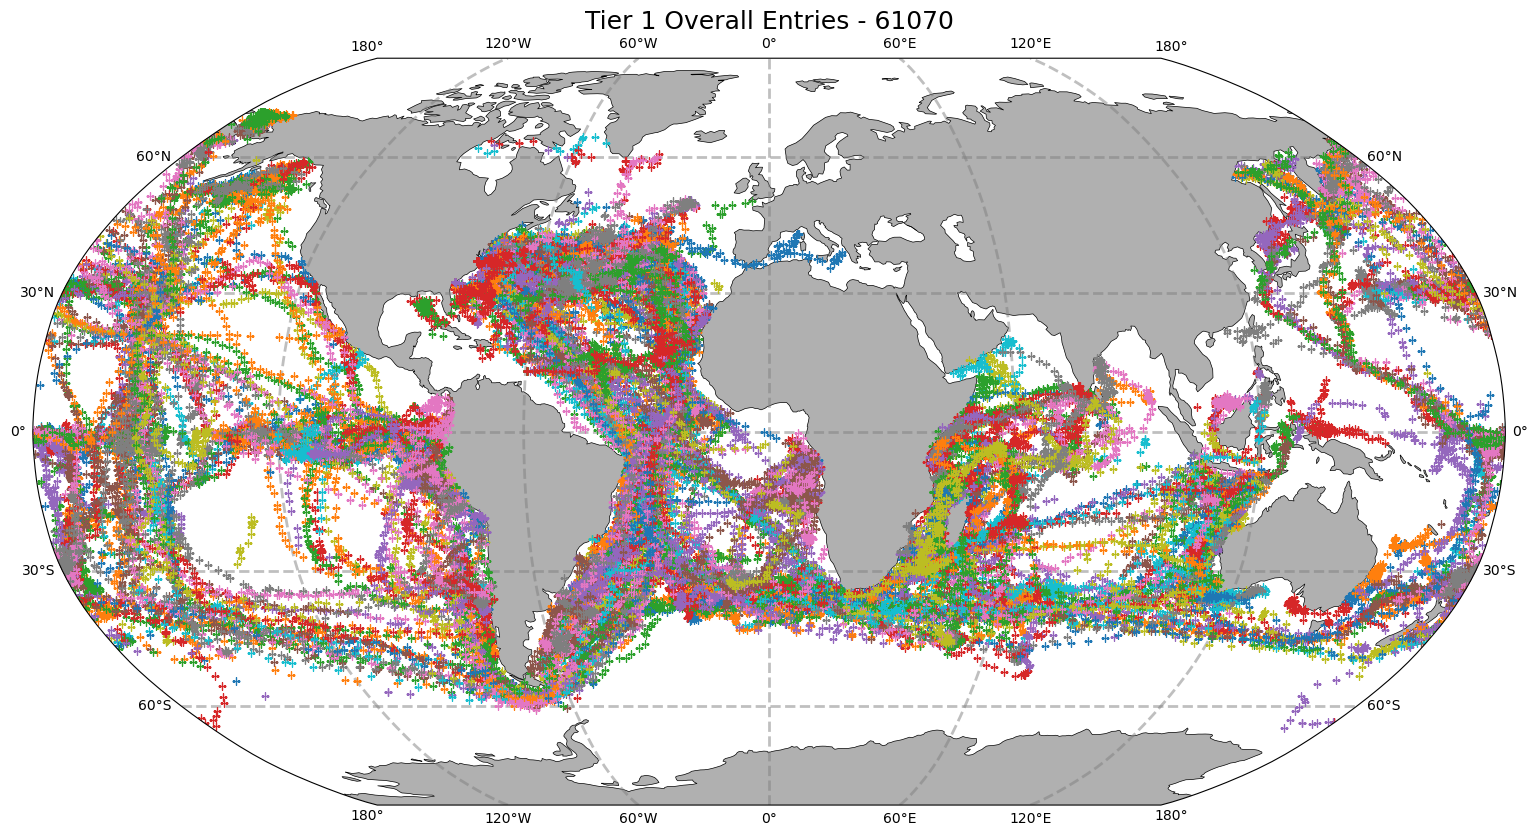

In [131]:
## set plotting boundaries
show_whole_earth = True

# Set Extent (only used if show_whole_earth=False)
# [minimum longitude, maximum longitude, minimum latitude, maximum latitude]
extent = [0, 60, 30, 60]

# Setting up figure parameters
fig, ax = plt.subplots(figsize=(19, 20), subplot_kw={"projection": ccrs.Robinson()})

## Set horizontal extent for plot
if show_whole_earth:
    ax.set_global()
else:
    ax.set_extent(extent, crs=ccrs.PlateCarree())

## plot coastlines
ax.coastlines(linewidth=0.5)

## Color land gray
ax.add_feature(cfeature.LAND, facecolor="#b0b0b0")

## Add gridlines to plot
gl = ax.gridlines(
    crs=ccrs.PlateCarree(),
    draw_labels=True,
    linewidth=2,
    color="gray",
    alpha=0.5,
    linestyle="--",
)

# # Initialize counter for the number of plotted values
# num_plotted_values = 0

# # Plotting the data
unique_years = sorted(df["Entry Date Time"].dt.year.dropna().unique())
for yr in unique_years:

    ## Get subset of data for given year
    df_for_yr = get_subset_for_year(yr)

    ## Plot subset of data
    ax.plot(
        df_for_yr.Longitude,
        df_for_yr.Latitude,
        "+",
        transform=ccrs.PlateCarree(),
        label="{:.0f}".format(yr),
    )

    # ## count number of entries
    n_records = df_for_yr.shape[0]
    num_plotted_values += n_records
    # print(yr,': ',n_records)

# ax.legend(loc=(1.1, -0.175))
ax.set_title("Tier 1 Overall Entries - 61070", fontsize=18)

# # Print the total number of plotted values
print("Total number of plotted values:", num_plotted_values)

# # Saving the figures
fig.savefig(os.path.join(Figures, "Tier1_Clean_up_plot_May13.svg"), bbox_inches="tight")
fig.savefig(
    os.path.join(Figures, "Tier1_Clean_up_plot_May13.jpg"), bbox_inches="tight", dpi=300
)
plt.show()

In [113]:
np.isnan(df_for_yr.Latitude).any()

True

Geographic Selection of "strange" entries

In [ ]:
df[
    (df["Latitude"].between(90, 100000, inclusive="both"))
    & (df["Longitude"].between(-180, 180, inclusive="both"))
]

In [ ]:
# Plotting Remaining Flagged Data

# Setting up figure parameters
fig, ax = plt.subplots(figsize=(19, 20), subplot_kw={"projection": ccrs.Robinson()})
_ = ax.set_global()
_ = ax.coastlines(linewidth=0.5)
_ = ax.add_feature(cfeature.LAND, facecolor="#b0b0b0")
gl = ax.gridlines(
    crs=ccrs.PlateCarree(),
    draw_labels=True,
    linewidth=2,
    color="gray",
    alpha=0.5,
    linestyle="--",
)

# Plotting the data
for err in df[df["coord_diff"] == True]:
    work = df.loc[df["coord_diff"] == True]
    _ = ax.plot(
        work.Longitude,
        work.Latitude,
        "+",
        color="r",
        transform=ccrs.PlateCarree(),
        label="{:.0f}".format(yr),
    )
    # print(yr,': ',np.shape(work))

# _ = ax.legend(loc=(1.1,-0.175))

# Saving the figure
# fig.savefig('NA_Unique Years.png',dpi=200)

In [ ]:
# Trying to find the data that over laps the continents for specific logbooks

# Specify the logbook ID you want to plot
specific_logbook_id = "Gideon Howland (Ship) 1838-1842"

# Filter the DataFrame to select rows with the specific logbook ID
specific_logbook_df = df[df["LogBook ID"] == specific_logbook_id]

# Set Extent
# extent = [-30, -20, 10, 15]
extent = [-60, 0, 0, 30]
# [minimum longitude, maximum longitude, minimum latitude, maximum latitude]

# Create the map
fig, ax = plt.subplots(figsize=(19, 20), subplot_kw={"projection": ccrs.Robinson()})
_ = ax.set_global()
_ = ax.set_extent(extent, crs=ccrs.PlateCarree())
_ = ax.coastlines(linewidth=0.5)
_ = ax.add_feature(cfeature.LAND, facecolor="#b0b0b0")
gl = ax.gridlines(
    crs=ccrs.PlateCarree(),
    draw_labels=True,
    linewidth=2,
    color="gray",
    alpha=0.5,
    linestyle="--",
)

# Plot the latitude and longitude of the specific logbook
_ = ax.plot(
    specific_logbook_df["Longitude"],
    specific_logbook_df["Latitude"],
    "+",
    transform=ccrs.PlateCarree(),
    label=specific_logbook_id,
)

# _ = ax.legend(loc=(1.1, -0.175))
plt.title(f"Entries for Logbook ID: {specific_logbook_id}", fontsize=18)

# Save the figure if needed
# plt.savefig('Gage_H_Phillips(1878-1880).jpg', dpi=300)

In [ ]:
# Finding the logbook ID, ID, and coordinates of flagged data

# Filter the DataFrame based on latitude and longitude ranges
filtered_df = df[
    (df["Latitude"] >= 14)
    & (df["Latitude"] <= 15)
    & (df["Longitude"] >= -30)
    & (df["Longitude"] <= -29)
]

# Display the filtered DataFrame
print(filtered_df[["LogBook ID", "ID", "Latitude", "Longitude"]])

In [ ]:
# Plotting all data with extents set to find points over land
# Or points that look wrong, stand by themself in the global ocean

# Set Extent
extent = [-90, -60, -10, 10]
# extent = [minimum longitude, maximum longitude, minimum latitude, maximum latitude]

# Setting up figure parameters
fig, ax = plt.subplots(figsize=(19, 20), subplot_kw={"projection": ccrs.Robinson()})
# _ = ax.set_global()
_ = ax.set_extent(extent, crs=ccrs.PlateCarree())
_ = ax.coastlines(linewidth=0.5)
_ = ax.add_feature(cfeature.LAND, facecolor="#b0b0b0")
gl = ax.gridlines(
    crs=ccrs.PlateCarree(),
    draw_labels=True,
    linewidth=2,
    color="gray",
    alpha=0.5,
    linestyle="--",
)

# Plotting the data
for yr in sorted(df["Entry Date Time"].dt.year.dropna().unique()):
    work = df[df["Entry Date Time"].dt.year == yr]
    _ = ax.plot(
        work.Longitude,
        work.Latitude,
        "+",
        transform=ccrs.PlateCarree(),
        label="{:.0f}".format(yr),
    )
    print(yr, ": ", np.shape(work))

# _ = ax.legend(loc=(1.1,-0.175))
plt.title("Overall Entries", fontsize=18)

In [ ]:
# Trying to find specific ID points that over laps the continents

# Specify the ID you want to plot
# specific_logbook_ID = (81392, 81394, 81406, 81407, 81408, 81409, 81410, 81411, 81413,\
# 81415, 81417, 81419, 81421, 81435, 81438)
specific_ID = (47352, 47355)
# Filter the DataFrame to select rows with the specific ID
specific_ID_DF = df[df["ID"].isin(specific_ID)]

# Define the geographic extent for the North Atlantic and Northern Africa
# extent = [-40, 20, -40, 40]  # [lon_min, lon_max, lat_min, lat_max]

# Create the map and plot the selected logbook data
fig, ax = plt.subplots(figsize=(10, 15), subplot_kw={"projection": ccrs.Robinson()})
# _ = ax.set_extent(extent, crs=ccrs.PlateCarree())
_ = ax.set_global()
_ = ax.coastlines(linewidth=0.5)
_ = ax.add_feature(cfeature.LAND, facecolor="#b0b0b0")
gl = ax.gridlines(
    crs=ccrs.PlateCarree(),
    draw_labels=True,
    linewidth=2,
    color="gray",
    alpha=0.5,
    linestyle="--",
)

# Plot the latitude and longitude of the specific IDs
_ = ax.plot(
    specific_ID_DF["Longitude"],
    specific_ID_DF["Latitude"],
    "+",
    markersize=20,
    transform=ccrs.PlateCarree(),
    label=specific_ID,
)

# Seeing what happens when manually fixing
# _ = ax.plot(1.066667, -23.616667, 'o', markersize = 20, transform=ccrs.PlateCarree(), label=specific_ID)
# _ = ax.plot(1.066667, 23.616667, 'o', markersize = 20, transform=ccrs.PlateCarree(), label=specific_ID)

_ = ax.legend(loc=(1.1, -0.175))
# plt.title(f'Entries for Logbook ID: {specific_id}', fontsize=18)

In [ ]:
unique_ws = df["LogBook ID"].dropna().unique()
print(unique_ws)

In [ ]:
# Finding ID values for ID book with data that overlaps continents
# Specify the logbook ID you are interested in
specific_logbook_id = "Westward-1978"

# Filter the DataFrame to select the specific logbook ID
specific_logbook_df = df[df["LogBook ID"] == specific_logbook_id]

# Get the unique 'ID' values associated with the specific logbook ID
associated_ids = specific_logbook_df["ID"].unique()

# Print the results
print(f"Logbook ID: {specific_logbook_id}, Associated IDs: {associated_ids}")

### Unique Values

In [ ]:
for col in [
    "Wind Direction",
    "Wind Speed/Force",
    "Sea State",
    "Cloud Cover",
    "Weather",
]:
    print(col + ":")
    vallist = df[col].dropna().unique()
    vallist.sort()
    print(vallist, "\n \n")

In [ ]:
unique_ws = df["Wind Speed/Force"].dropna().unique()
print("Unique wind force terms: ", np.size(df["Wind Speed/Force"].unique()))
print(unique_ws)

Mapping unique 'Wind Speed/Force' values onto Beaufort Scale values (0-12)

In [ ]:
# Old classification of wind terms done by Bastian

unique_ws_0 = [
    "calm",
    "calm and baffling",
    "calm & baffling",
    "calms",
    "wind died away, shifted suddenly",
    "calm no winds",
    "pretty much calm",
    "dead flat",
    "flat calm",
    '"dead calm"',
    "calm winds",
    "calmes",
    "died away",
    "lulls",
    "lulled",
    "calmy",
    "calm,",
    "no winds",
    "dead calm",
    "not much winds",
    "wind out",
    "calm or nearly so",
    "variable & calm",
    "calms by spells",
    '"Under short sail"',
    "calm nearly",
    "too calm",
    "Calm wind",
    "no wind",
    "not much wind",
    "calm breeze",
    "calm & bafling",
    "Calm No Wind",
    "fine calms",
    "about calm",
    "Calm No Wind",
    "Calm No Wind",
    "squally & calms",
]
unique_ws_01 = [
    "light airs & calms",
    "light airs & calm",
    "light winds & calms",
    "light variable winds & calms",
    "light airs, with calms",
    "light variable winds and calms",
    "light airs and calms",
    "light airs with calms",
    "light airs/calms",
    "calm and light winds",
    "light winds and calms",
    "calms & light airs",
    "little or no winds",
    "light wind and calms",
    "light winds with calms",
    "almost a calm",
    "nearly a calm",
    "nearly calm",
    "light airs, calm",
    "light airs, calms",
    "light baffling airs and calm",
    "light variable & calms",
    "light and calm airs",
    "light airs and calm",
    "light breezes and calms",
    "light baffling airs and calms",
    "baffling airs and calms",
    "light and calm breezes",
    "airs and calms",
    "light calm winds",
    "high airs and calms",
    "light air & calm",
    "light to no winds",
    "light & calm",
    "light & calms",
    "light breezes & calms",
    "calms & light breezes",
    "calms & light variable breezes",
    "light winds & variable with calms",
    "light airs & calms & baffling",
    "baffling & calms",
    "calms & transient breezes",
    "calms & light variable airs",
    "calm and then light breezes",
    "light & variable & calms",
    "light air inclining to calm",
    "light airs inclining to calm",
    "light airs inclining to calms",
    "variable breezes and calms",
    "light baffling & calms",
    "light airs and clams",
    "calm with light variables",
    "calms with light variables",
    "light airs inclined to calm",
    "light airs inclines to calm",
    "calm & baffling with now & then breezes",
    "very faint airs",
    "almost calm",
    "light variable airs and calms",
    "baffling & calm",
    "light airs variable & calms",
    "light next to calm",
    "calms with some light airs",
    "light variable breezes and calms",
    "light breezes & calm",
    "calm or very light breezes",
    "calm & light breezes",
    "light air & calms",
    "very light & baffling",
    "very light baffling",
    "calm and variable winds",
    "variable winds and calms",
    "very light air & baffling",
    "light breezes & calms by spells",
    "light baffling & calm",
    "light variable airs & calms",
    "Fine Calms",
    "variable airs calm",
    "variable airs calms",
    "light airs & clams",
    "variable airs & calms",
    "light variable air & calms",
    "light airs calms",
    "calms & squally",
    "calm & baffling with now & then breeze",
    "little or no wind",
    "very light wind",
    "Light and calm wind",
    "light to no wind",
    "Little or no wind",
    "Calm & Light Bafling Winds",
    "Light Bafling Winds & Calms",
    "Calm, light bafling breezes",
    "light and bafling with a good part calm",
    "light bafling winds and calm",
    "light and bafling with calms",
    "light bafling winds and calms",
    "light bafling airs and calm",
    "Light aires, with calms",
    "Calm and Light Wind",
    "Light and Baffling Airs and Calms",
    "Variable Airs and Calms",
    "Light and Variable Calms",
    "calms & light baffling airs",
    "light baffling airs & calms",
    "Calm wind",
    "Light and calm wind",
    "Calm & Light Bafling Winds",
    "Light Bafling Winds & Calms",
    "Calm, light bafling breezes",
    "Light aires, with calms",
    "Calm and Light Wind",
    "Light and Baffling Airs and Calms",
    "Variable Airs and Calms",
    "Light and Variable Calms",
    "Light and Variable Winds and Calms",
    "Calm wind",
    '"Verible winds and calms"',
    "Light and calm wind",
    "Calm & Light Bafling Winds",
    "Light Bafling Winds & Calms",
    "Calm, light bafling breezes",
    "Light aires, with calms",
    "Calm and Light Wind",
    "light and variable calms",
    "light and variable winds and calms",
    '"verible winds and calms"',
    "light calms",
    "living calms",
    "dead calms",
]
unique_ws_1 = [
    "light airs and variable",
    "light baffling airs",
    "light baffling",
    "light airs and very baffling",
    "airs",
    "very light air",
    "light airs",
    "light air",
    "light airs from land",
    "light airs variable",
    "light airs & baffling",
    "pleasant light air",
    "very light airs",
    "light air & baffling",
    "light airs, variables",
    "calm, light breezes",
    "calm breezes",
    "calm & light baffling winds",
    "light baffling winds & calms",
    "calm, light baffling breezes",
    "light and baffling with a good part calm",
    "light baffling winds and calm",
    "light and baffling with calms",
    "light baffling winds and calms",
    "light wind with calms",
    "light variable airs",
    "light airs & variable",
    "light wind and calm",
    "light varibale",
    "more light",
    "light land & sea breezes",
    "light airs & changeable",
    "light winds and then calm",
    "light (winds), calm",
    "very light winds",
    "very light trade winds",
    "light trades and calms",
    "light airs of winds",
    "light air of winds",
    "light airs and squally",
    "light airs and baffling",
    "light breezes & baffling",
    "faint airs",
    "light winds & calm",
    "light winds calms",
    "light trades & calms",
    "light variable winds & calm",
    "calm with light winds at intervals",
    "light trades & calms",
    "flairs of wind and calms",
    "calms light winds",
    "light winds and calm",
    "Very light breeze",
    "Short interval light breezes",
    "Occasional light airs",
    "Light Breeze & Easing",
    "light airs & clear",
    "very light breeze",
    "Very Light Wind",
    "little wind",
    "very light trade wind",
    "Light Airs of Wind",
    "light air of wind",
    "light airs of wind",
    "Light Bafling Breezes",
    "light bafling airs",
    "light and bafling",
    "light bafling",
    "Light aires",
    "little breezes",
    "short interval light breezes",
    "occasional light airs",
    "Light and Variable Winds and Calms",
    "Light and Variable Airs",
    "Light and Pleasant",
    "light & baffling airs",
    "Light aires",
    "Light and Variable Airs",
    "Light Airs and Squalls of Wind",
    "Light aires",
    "variable airs and calms",
    "light and variable airs",
    "gentle airs",
    "light and calms",
    "light breezes & calmz",
    "calm with frequent light airs",
    "light airs to light breezes",
    "light airs & squalls of winds",
    "light airs and calms and then a light breezes",
    "light airs & calms & squalls of winds",
]
unique_ws_2 = [
    "light winds",
    "light",
    "light baffling winds",
    "small winds",
    "small breezes",
    "light variable winds",
    "light winds & variable",
    "light winds and variable",
    "light sea breezes",
    "light trades",
    "light breezes and baffling",
    "light breeze and baffling",
    "wind light and baffling",
    "light and baffling winds",
    "light winds & baffling",
    "light breezes",
    "light breeze from bay",
    "light breezes and baffling",
    "baffling",
    "light variable",
    "light & variable",
    "very light & pleasant",
    "very light breezes",
    "very light",
    "light & baffling",
    "light, variable",
    "llight, variable",
    "light baffling breezes",
    "light land breezes",
    "light and variable",
    "light and baffling",
    "light wind variable",
    "light land and sea breezes",
    "light wind & flowy",
    "blowy & baffling",
    "baffling and light",
    "baffling and flowy winds",
    "light  breezes",
    "light breeze & baffling",
    "light breezes and variables",
    "light breezes & variable",
    "light (winds)",
    "baffling winds",
    '"light and []* wind"',
    "light and calm winds",
    "light (wind)",
    "light trade winds",
    "light and pleasant breezes",
    "lights winds",
    "light traids",
    "light wind and variables",
    "light wind and variable with calms",
    "light wind and variable",
    "breeze light",
    "light (breezes)",
    "light variable breezes",
    '"light easterly winds"',
    "light trade",
    "light &variable",
    "light baffling trades",
    "light pleasant breezes",
    "light brezes",
    "light breezes & squally",
    "light trade wind with frequent squalls",
    "light windss with frequent squalls of winds",
    "light winds & squally",
    "light breeze & squally",
    "lighter winds",
    "light squalls of winds",
    "light winds and variables",
    "pleasant light breezes",
    "light and gentle breezes",
    "light breezes and squally",
    "light unsteady winds",
    "feather winds",
    "light breeze and squalls",
    "light very unsteady breezes",
    "soft winds",
    "light winds and baffling",
    "light variables",
    "light steady winds",
    "light & baffling winds",
    "lightv breezes",
    "light baffling & variable",
    "steady & light",
    "(light) breezes",
    "steady & light",
    "light steady",
    "light head winds",
    "6 knot breezes",
    "5 knot breezes",
    "light & somewhat baffling",
    "moderate winds & calms",
    "little winds",
    "light and pleasant variables",
    "calm and moderate",
    "light flattening breezes",
    "Light Breeze",
    "Light Winds and Very Baffling",
    "light breeze",
    "Light Wind",
    "Light breeze",
    "Little breeze",
    "Light wind",
    "light wind",
    "light trade breeze",
    "light breeze & freshene",
    "light breeze & freshening",
    "light breeze & freshens",
    "light airs & squalls",
    "light land breeze",
    "Light Sea Breeze",
    "6 knot breeze",
    "5 knot breeze",
    "light trade wind",
    "light winds with frequent squalls of wind",
    "light squalls of wind",
    "gentle wind",
    "Soft Wind",
    "Light Baffling Wind",
    "Light Variable Wind",
    "Light Baffling Breeze",
    "LIght Breeze",
    "Light breeeze",
    "Light  breeze",
    "light sea breeze",
    "Light Bafling Winds",
    "Light Bafling",
    "light variable wind",
    "small wind",
    "light baflin winds",
    "light bafflin",
    "Light and blaffling winds",
    "Light light winds",
    "Small Wind",
    "light winds and very baffling",
    '"under short sail"',
    "light trade breezes",
    "light breeze & easing",
    "Light Pleasant Breeze",
    "Light and Pleasant Breeze",
    "Light and Variable Winds",
    "slight breeze",
    "very light wind & squally",
    "Light Breezes and Very Baffling",
    "Light and Baffling Breezes",
    "light winds & variable winds",
    "Light Airs and Squalls of Wind",
    "Soft wind",
    "Light and steady breezes",
    '"Verible winds and calms"',
    "Little breeze",
    "Soft Wind",
    "Light Baffling Wind",
    "Light breeeze",
    "Light Baffling Breeze",
    "Light  breeze",
    "Light Bafling Winds",
    "Light Bafling Breezes",
    "Light and blaffling winds",
    "Light light winds",
    "Light Pleasant Breeze",
    "Light and Pleasant Breeze",
    "Light and Variable Winds",
    "Light and Pleasant",
    "Light Breezes and Very Baffling",
    "Light and Baffling Breezes",
    "Soft wind",
    "Light and steady breezes",
    "Little breeze",
    "Soft Wind",
    "Light Baffling Wind",
    "Light Baffling Breeze",
    "Light breeeze",
    "Light  breeze",
    "Light Bafling Winds",
    "Light Bafling Breezes",
    "Light and blaffling winds",
    "Light light winds",
    "light and baffling airs and calms",
    "light and variable winds",
    "slight breezes",
    "light breezes and very baffling",
    "light and baffling breezes",
    "light airs and squalls of winds",
    "light and steady breezes",
    "light and changeable winds",
    "light breezes to fair winds",
    "light breezes with frequent calms",
    "light winds & squalls",
    "light to fine breezes",
    "light baffling winds`",
    "light winds & strong squalls",
]
unique_ws_23 = [
    "pleasant breezes",
    "pleasant winds",
    "more pleasant",
    "pleasant",
    "nice & pleasant",
    "nice breezes",
    "very pleasant",
    "nice",
    "pleasant baffling",
    "pleasant (breezes)",
    "pleasant trades",
    "pleasant breezes & various",
    "more pleasant breezes",
    "pleasant trade winds",
    "pleasant sea breezes",
    "light pleasant trades",
    "moderate trades & calms",
    "light breezes & calm & squally",
    "calm & light squalls",
    "7 knot breezes",
    "very pleasant winds",
    "strong calm",
    "pleasant breeze",
    "steady breeze",
    "pleasnat breezes",
    "pleasant sea breeze",
    "7 knot breeze",
    "Very Pleasant Wind",
    "light topgallant breeze",
    "Pleasant light breeze",
    "more pleasant breeze",
    "Pleasant Wind",
    "Pleasant Breeze",
    "light winds with squalls",
    "light breezes with squalls of wind",
    "Light breeze to Fresh",
    "Quick, light",
    "Very Pleasant Wind",
    "Pleasant light breeze",
    "Pleasant Wind",
    "Light breeze to Fresh",
    "Quick, light",
    "Very Pleasant Wind",
    "Pleasant light breeze",
    "Pleasant Wind",
    "light and pleasant",
    "light breezes with squalls of winds",
    "light breeze to fresh",
    "quick, light",
    "brisk winds, light winds & squally",
]
unique_ws_3 = [
    "gentle winds",
    "gentle",
    "gentle breezes",
    "3",
    "fine winds and light",
    "gentle breezes & variable",
    "gentle trades",
    "light topgallant breezes",
    "light and fresh",
    "gentle & variable",
    "fine light breezes",
    "light and fresh breezes",
    "moderate breezes and calms",
    "moderate trades and calms",
    "light winds calms & heavy squalls",
    "fresh gales & calms",
    "nice steady breezes",
    "nice breeze & baffling",
    "nice breeze baffling",
    "smooth breezes",
    "baffling & freshening",
    "nice working breezes",
    "squally light winds",
    "fine and pleasant",
    "frequent & light squalls",
    "Good breeze",
    "nice steady breeze",
    "Gentle Wind",
    "Gentle wind",
    "moderate & light",
    "gentle breezes & calms",
    "gentle sea breezes",
    "light moderate breezes",
    "light moderate winds",
    "gentle breezes and strong",
    "light & brisk winds",
]
unique_ws_4 = [
    "moderate winds",
    "moderate breezes",
    "moderate",
    "good breezes",
    "moderate winds & variable",
    "moderate winds between squalls",
    "moderate baffling winds",
    "moderate and baffling winds",
    "more moderate",
    "wind moderated a little",
    "moderate trades",
    "wind continued and moderated a little",
    "moderate trade winds",
    "moderate winds & baffling",
    '"more moderate"',
    '"moderate"',
    "moderate baffling",
    "moderating",
    "moderating breezes",
    "quite moderate",
    "moderates",
    "a little more moderate",
    "moderate variable",
    "moderate increasing winds",
    "moderate wind variable",
    "fine winds and gentle",
    "moderate whole sail breezes",
    "good wholesale breezes",
    "moderate & variable",
    "moderate breezes & variable",
    "moderate airs",
    '"moderate trades"',
    "moderated between squalls",
    "moderated",
    '"moderate wind"',
    '"moderate visible winds"',
    '"moderate winds"',
    "moderate (winds)",
    "moderate wind light and baffling",
    "moderarte breezes",
    "modest winds",
    "moderate wind and squally",
    "more moderate winds",
    "inclining to moderate",
    "mor moderate",
    "more modest",
    "moderate  breezes",
    '"moderate at day light wind freshened"',
    "good",
    "whole sail breezes",
    "whole sail",
    "moderate breeze & squally",
    "moderate breezes with light squalls",
    "moderate winds & squally",
    "moderate trade winds with frequent squalls of wind",
    "moderate trades & squally",
    "moderate trade",
    "good breeze with frequent squalls of winds",
    "moderate traes",
    "very steady moderate breezes",
    "modertae trades",
    "moderatre",
    "more moderate trades",
    "moderate trade winds with frequent squalls of winds",
    "very moderate breezes",
    "very moderate trades",
    "fair trades",
    "moderate baffling breezes",
    "moderate breezea",
    "light winds heavy squalls",
    "calms & squalls",
    "heavy squalls & calms",
    "calms heavy squalls",
    "calms squalls",
    "squalls calms",
    "light winds heavy squalls & calms",
    "heavy squalls calms",
    "moderate variable breezes",
    "moderate variable winds",
    "fresh gales & calms",
    "moderate and rainy",
    "fresh gales calm",
    "moderate btreezes",
    "moderate variable winds",
    '"sometimes calm and at others blowing a gale"',
    "light breeze & squalls",
    "very moderate & pleasant winds",
    "moderates breezes",
    "moderate but rough",
    "moderate breeze & baffling",
    "strong and light winds",
    "light and strong winds",
    "Moderate Breeze",
    "Moderate breeze",
    "Moderate wind",
    "Moderate Wind",
    "moderate breezesQENE",
    "moderate breeze",
    "moderate breezes but variable",
    "moderate breeze & freshened",
    "moderate breeze & pleasant",
    "moderate wind",
    "moderate winds with some squalls of wind",
    "nice all sail breeze",
    "good all sail breeze",
    "moderating breeze",
    "very moderate & pleasant wind",
    "moderates breeze",
    "topgallant breeze",
    "middling strong topgallant breeze",
    "moderate trade wind",
    "moderate trade wind with frequent squalls of wind",
    "very steady moderate breeze",
    "Moderate  breeze",
    "Fair Wind",
    "moderarte breeze",
    "modest wind",
    "More Moderate Wind",
    "moderate increasing wind",
    "fair breeze",
    "Moderate whole sail breeze",
    "Moderate Breezs",
    'Moderate Winds & "Baffling"',
    "mild wholesail breezes",
    "moderate breezesqene",
    "modertae winds",
    "Moderate and Baffling Breezes",
    "Very moderate",
    "moderate all sail breeze",
    "moderate moderate breeze",
    "somewhat moderate",
    "moderate with some strong gusts",
    "very moderate winds",
    "very moderate",
    "passing squalls",
    "squally by spells",
    '"wind" & squally by spells',
    "Fair Trade",
    "Mild wholesail breeze",
    "Moderate  breeze",
    "More Moderate Wind",
    "Moderate whole sail breeze",
    "Moderate Breezs",
    'Moderate Winds & "Baffling"',
    "Moderate and Baffling Breezes",
    "Moderate  breeze",
    "More Moderate Win",
    "Moderate whole sail breeze",
    "Moderate Breezs",
    'Moderate Winds & "Baffling"',
    "moderate and baffling breezes",
    "moderate all sail breezes",
    "moderate moderate breezes",
    "moderate breeze to gale",
    "fine light trades",
    "light variable trades",
    "moderate  to briskbreezes",
]
unique_ws_45 = [
    "fine winds",
    "fine breezes",
    "fine, moderate winds",
    "fine, moderate breezes",
    "fine",
    "fine light winds",
    "fine trades",
    "very fine winds",
    "very fine breezes",
    "fine fresh breezes",
    "fine moderate breezes",
    "fine sea breezes",
    "fine breezes & rugged",
    "fine pleasant",
    "fine trade winds",
    "fine pleasant trades",
    "fine land & sea breezes",
    "fine trade",
    "topgallant breezes",
    "rugged winds",
    "fine leading breezes",
    "fine trade breezes",
    "fine baffling breezes",
    "fine whole sail breezes",
    '"fine hole sail breeze"s',
    '"fine hole sail breeze"',
    '"fine hole sail breezes"',
    '"fine breeze"',
    "fine pleasant (breezes)",
    "moderate gales calms",
    "moderate trades with some squalls",
    "moderate windss with some squalls of winds",
    "fine pleasant winds",
    "winds & squally",
    "nice all sail breezes",
    "handsome breezes",
    "fine pleasant trade winds",
    "fine breezes and calms",
    "good all sail breezes",
    "nice all sail breeze & baffling",
    "fine breeze",
    "Fine wind",
    "Nice breeze",
    "Fine breeze",
    "Mild wholesail breeze",
    "Fine Breeze",
    "fine trade breeze",
    "fine breeze & squally by spells",
    "fine pleasant breeze",
    "good breeze",
    "fine wind",
    "nice breeze",
    "Handsome Breeze",
    "nice working breeze",
    "Good Breeze",
    "Fine Wind",
    "good breeze with frequent squalls of wind",
    "fine leading breeze",
    "fine trade wind",
    "Fine Trade Breeze",
    "Buffed by the Wind",
    "Buffed by the wind",
    "fine sea breeze",
    "Good Wholesale Breeze",
    "Fine widns",
    "Fne Wind",
    "Very Fine Wind",
    "Very fine breeze",
    "Fresh to moderate wind",
    "Fresh breeze to moderate",
    "Good Winds",
    "Good Wind",
    "Good Trades",
    "all sail breeze",
    "fine breeze & some squally by spells",
    "fine breeze & some squally",
    "Fine Breezes and Baffling",
    "Handsome Breeze",
    "Fine whole sail breeze",
    "Fair Wind",
    "Good Wholesale Breeze",
    "Fine widns",
    "Fne Wind",
    "Very Fine Wind",
    "Very fine breeze",
    "Wholesale Breeze",
    "Fresh to moderate wind",
    "Fresh breeze to moderate",
    "Good Winds",
    "Good Wind",
    "Good Trades",
    "Fine Breezes and Baffling",
    "Fair Trade",
    "Wholesail breeze",
    "Mild wholesail breeze",
    "Handsome Breeze",
    "Fine whole sail breeze",
    "Fair Wind",
    "Good Wholesale Breeze",
    "Fine widns",
    "Fne Wind",
    "Very Fine Wind",
    "Very fine breeze",
    "wholesale breezes",
    "fresh to moderate winds",
    "fresh breeze to moderate",
    "good winds",
    "good trades",
    "all sail breezes",
    "fine breezes and baffling",
    "fair trade",
]
unique_ws_5 = [
    "fresh winds",
    "fresh land breezes",
    "fresh trades",
    "fresh",
    "blowing fresh",
    "blows fresh",
    "fresh breezes",
    "freshening",
    "fresh variable",
    "fresh steady breezes",
    "fresh baffling",
    "freshening breezes",
    "fresh baffling breezes",
    "fresh breezes & baffling",
    "very fresh breezes",
    "fresh trade",
    "fresh sea breezes",
    "fresh light breezes",
    "fresh trade winds",
    "fresh breeze and baffling",
    "blowed fresh",
    "fresh  breezes",
    "fresh breezes & variable",
    "breezes fresh & variable",
    "fresh but steady",
    '"wind freshened"',
    "freshens",
    "fresh breezes & changeable",
    "fresh breeze & baffling",
    "fresh airs",
    "fresh breezes & squally",
    "blew fresh",
    "fresh winds & squally",
    "fresh breeze & squally",
    "steady breeze & howling",
    "fresh trade breezes",
    "fresh winds & squally",
    "fresh trades and squally",
    "fresh breezes baffling and flowy",
    "fresh winds and squally",
    "fresh breezes & flawy",
    "fresh increasing winds",
    "breeze fresh",
    "quite fresh",
    "blowing  fresh",
    "fresh breezes & good winds",
    "fresh & variable",
    "moderate breezes & squally",
    "fresh breezes variable",
    "fresh breezers",
    "very fresh trades",
    "quick breezes",
    "fresh ne trade winds",
    "quick breezes & squally",
    "Fresh Breeze",
    "Running winds",
    "fresh breeze",
    "Fresh breeze",
    "stiff breeze",
    "Fresh breeze and squally",
    "Fresh Wind",
    "fresh breezes & squalls",
    "fresh trade wind",
    "fresh sea breeze",
    "fresh breeze with squalls of wind",
    "fresh breeze/squalls of wind",
    "freshening breeze",
    "fresh wind",
    "strong but moderating breeze",
    "Fresh  breeze",
    "Fresh Trade Breeze",
    "Fresh wind",
    "fresh steady breeze",
    "fresh baffling breeze",
    "very fresh breeze",
    "Fresh land breeze",
    "fresh breeze and squally",
    "Fresh Variable Breezes",
    "Fresh and Baffling Breezes",
    "Quick breeze",
    "fresh & squally",
    "fresh trades & squally",
    "Fresh Variable Winds",
    "fresh trades, squall",
    "fresh breeezs",
    "Fresh sail",
    "fresh  breeze",
    "Fresh Trade / Baffling",
    "Fresh  breeze",
    "Fresh Trade Breeze",
    "Fresh land breeze",
    "Fresh Variable Breezes",
    "Fresh and Baffling Breezes",
    "Fresh Variable Winds",
    "fresh trades, squalls",
    "Fresh sail",
    "Fresh Trade / Baffling",
    "Fresh Trade Breeze",
    "Fresh land breeze",
    "fresh variable breezes",
    "fresh and baffling breezes",
    "fresh variable winds",
    "fresh sail",
    "fresh trade / baffling",
    "briak winds",
    "strong to moderate breezes",
    "fresh to moderate breezes",
    "brisk breze",
    "brisk wind & squally",
    "brisk variable winds",
    "good fresh breezes",
    "fine steady breezes",
    "fresh breezes to strong winds",
    "fine breezes & squally",
]
unique_ws_56 = [
    "breezesd up to brisk breezes",
    "moderate with squalls",
    "fresh passing squalls",
    "fresh squalls",
    "light squalls",
    "light squalls & baffling",
    "a little squally",
    "a few squalls",
    "strong fresh breezes",
    "fresh strong breezes",
    "fresh breezes with passing squalls",
    "fresh breeze with squalls of winds",
    "fresh breeze/squalls of winds",
    "some light squalls",
    "some heavy winds",
    "strong but moderating breezes",
    "fresh breezes & strong squalls",
    "fresh breezes with squalls",
    "fresh breezes & squalls of wind",
    "Buffed by the Wind",
    "Buffed by the wind",
    "Buffed by the Wind",
    "Buffed by the wind",
    "fresh breezes & squalls of winds",
    "strong to fresh breezes",
]
unique_ws_6 = [
    "strong winds",
    "brisk winds",
    "brisk breezes",
    "strong winds & variable",
    "strong south",
    "strong wind, heavy squall with a tempest",
    "strong squall",
    "squall winds",
    "strong trades",
    "strong blows",
    "strong trade",
    "strong winds and breezes",
    "brisk trade",
    "strong wind under double reefed top sails",
    "heavy winds",
    "squalls",
    "strong trade winds",
    "brisk trades",
    "heavy breezes",
    "high winds",
    "strong squalls",
    "strong airs",
    "very strong winds",
    "blowing hard",
    "blows strong",
    "blowing strong",
    "strong breeze and squally winds",
    "strong breezes",
    "strong",
    "squally",
    "strong land breezes",
    "strong sea breezes",
    "heavy",
    "blowing very heavy",
    "very strong",
    "blowing very hard",
    "stiff breezes",
    "blowing on in squalls",
    "strong baffling",
    "quite heavy squalls",
    "blowing up heavy in squalls",
    "blowing heavy",
    "squall",
    "raging & squally",
    "blows hard in squalls",
    "very strong breezes",
    "strong heavy breezes",
    "very heavy",
    "hard",
    "hard in squalls",
    "blowing strongly",
    "strong varianble winds",
    "blows heavy",
    "strong squalls of winds",
    "breeze heavy",
    "strong in squalls",
    "strong flows",
    "hard squalls of wind & rain",
    "strong breeze & rugged",
    "brisk breeze & breezing on",
    "squally winds",
    "heavy squall",
    "brisk with a little variation",
    "brisk & variable",
    "severe",
    '"blowing hard"',
    '"strong trades"',
    "strong breezes & variable",
    "brisk",
    "strong & variable",
    "heavy squals",
    "big winds",
    "very strong trades",
    "strong (winds)",
    "strong winds and squally",
    "brisk trade winds",
    "very heavy squalls",
    "squalls of rain",
    "strong breezes and squalls and calms betwixt them",
    "strong brerezes",
    "variable & strong",
    "smart squall",
    "sharp squalls",
    "very squally",
    "strong wind and squally",
    "strong  winds",
    "heavy squals of winds",
    "squally with rain",
    "winds squally",
    "strong wind with light squalls",
    "very windy",
    "high airs",
    "squally with heavy rain",
    "strong variable",
    "more brisk",
    "frequent squalls",
    "strong flaws",
    "squally & baffling",
    "quite strong",
    "strong land & sea breezes",
    "smart breezes",
    "strong breezes & squally",
    "strong baffling winds",
    "middling strong",
    "rather strong",
    "strong (wind) & squally",
    "strong trades & squally",
    "strong winds, squally",
    "strong wind & squally",
    "strong topgallant breezes",
    "middling strong topgallant breezes",
    "very squally winds",
    "very windy squally",
    "strong trade wind with frequent squalls",
    "strong trade winds with frequent squalls of winds",
    "strong trade wind with squalls",
    "strong trade wind & very squally",
    "strong breeze with frequent squalls",
    "strong winds with frequent squalls",
    "began to blow hard",
    "blowed heavy",
    "strong winds & squally",
    "strong trades & very squally",
    "strong breeze. & very squally",
    "strong breeze & squally",
    "squalls of strong winds",
    "(strong) trades",
    "strong trades and squally",
    "strong breeze and squally",
    "brisk breeze and squally",
    "strong winds and variables",
    "strong very unsteady",
    "strong & hard squalls",
    "strong and steady winds",
    "strong wind & squalls",
    "strange (strong?) winds",
    "strong wind & squall",
    "strongwinds",
    "strong winds with squalls",
    "strong breeze & very squally",
    "strong very unsteady winds",
    "strong wind and squalls",
    "strong wind and squall",
    "white squall",
    "thick winds",
    "brisk trades with passing squalls",
    "brisk breezes with passing squalls",
    "brisk with passing squalls",
    "brisk sea breezes",
    "brisk squall",
    'strong breeze "moderating gradually"',
    '"whole sail breeze"',
    "streong breezes",
    "blew rugged",
    "heavy sea",
    "strong trade breezes",
    "stiff",
    "still blowing heavy",
    "strong breezes & hard squalls of winds",
    "strong winds & very squally",
    "strong breeze & baffling",
    "breeze in squalls",
    "blowing heavy in squalls",
    "brisk breezes & squally",
    "brisk winds & squally",
    "strong winds & hard squalls",
    "strong winds & hard squalls",
    "rough winds",
    "blowing hard winds",
    "fresh breeze increases to a gale",
    "variable squalls",
    "strong winds & some squally",
    "strong breezes & very squally",
    "strong breeze",
    "Strong Breeze",
    "strong breezes & some squally",
    "Strong breeze",
    "Strong wind",
    "Strong Wind",
    "Wholesail breeze",
    "strong breeze & squally by spells",
    "strong breezes & squally by spells",
    "Strong breeze and squalls",
    "Strong Westerly Wind",
    "smart squalls",
    "strong trade breeze",
    "strong & increasing breeze",
    "rugged & squally by spells",
    "brisk breeze",
    "strong winds & squalls",
    "strong wind",
    "strong wind & heavy squalls",
    "Thick strong breezes",
    "brisk brezzes",
    "Brisk Wind",
    "Thick Wind",
    "Brisk Breeze",
    "brisk sea breeze",
    "smart breeze" "streong breeze",
    "some heavy wind",
    "brisk trade wind",
    "strong breezes & hard squalls of wind",
    "strong trade wind",
    "Rough Wind",
    "Heavy Squalls of Wind",
    "brisk wind",
    "whole sail breeze",
    "strong topgallant breeze",
    "very squally wind",
    "heavy squalls of wind",
    "strong trade wind with frequent squalls of wind",
    "very strong trade wind & squally with considerable wind",
    "squalls of strong wind",
    "strong squalls of wind",
    "strong and steady wind",
    "squalls of wind",
    "strange (strong?) wind",
    "strongwind",
    "Heavy wind",
    "Fine whole sail breeze",
    "Squally Wind",
    "Heavy Wind",
    "Brisk wind",
    "Strong  wind",
    "squally wind",
    "strong land breeze",
    "strong sea breeze",
    "Strong Varianble Wind",
    "Strong Squalls of Wind",
    "Strong widns",
    "breezed up to brisk breeze",
    "String winds",
    "Smart breeze",
    'none given ["double reefed = strong wind"]',
    "Strong Breeeze",
    "Strong Breeze and Squally Wind",
    "wholesail breezes",
    "strong breeze and squalls",
    "strong westerly winds",
    "strong & increasing breezes",
    "thick strong breezes",
    "Strong blustering winds",
    "Strong Br",
    "Wholesale Breeze",
    "Strong and Steady Trades",
    "Strong Variable Winds",
    '"winds" & squally',
    "strong winds & heavy squalls",
    "Tolerable Strong Breezes",
    "Strong Squally Breezes",
    "strong breeezs",
    "Bad Squalls",
    "Strong Head Winds",
    '"winds and squalls"',
    "strong breezes with squalls",
    "strong trades & strong squalls",
    "strong breezes & heavy squalls",
    "still blowing strong",
    "Strong Squall and Trades",
    "strong trade winds & squally",
    "blowing a stiff breeze",
    "blowing a furious norther",
    "strong gusts",
    "strong norther",
    "Strong Easterly",
    "blowing in strong",
    "brisk all sail breeze",
    "stromg",
    "Strong Westerly",
    "strong winds & heavy squalls by spells",
    "Heavy wind",
    "strong breezes & squalls of wind by spells",
    "strong winds & some squalls",
    "strong breezes & some squally by spells",
    "A Heavy Swell On",
    "Wholesail breeze",
    "Strong Westerly Wind",
    "Thick Wind",
    "smart breeze",
    "streong breeze",
    "Rough Wind",
    "Heavy Wind",
    "Strong  wind",
    "Heavy squals of wind",
    "Strong Varianble Wind",
    "Strong widns",
    "String winds",
    "Smart breeze",
    "Strong Breeeze",
    "Strong Breeze and Squally Wind",
    "Strong blustering winds",
    "Strong Br",
    "Strong and Steady Trades",
    "Strong Variable Winds",
    "Tolerable Strong Breezes",
    "Strong Squally Breezes",
    "Quick breeze",
    "Bad Squalls",
    "Strong Head Winds",
    "Strong Squall and Trades",
    "Strong Easterly",
    "Strong Westerly",
    "Heavy wind",
    "A Heavy Swell On",
    "Strong Westerly Wind",
    "Thick Wind",
    "Rough Wind",
    "Heavy Wind",
    "Strong  wind",
    "Heavy squals of wind",
    "Strong Varianble Wind",
    "Strong widns",
    "String winds",
    "Strong Breeeze",
    "Strong Breeze and Squally Wind",
    "strong blustering winds",
    "strong br",
    "strong and steady trades",
    "strong variable winds",
    "tolerable strong breezes",
    "strong squally breezes",
    "bad squalls",
    "strong head winds",
    "strong squall and trades",
    "blowing a stiff breezes",
    "strong easterly",
    "brisk all sail breezes",
    "strong westerly",
    "a heavy swell on",
    "strong breezes to gales",
    "strong breezes but moderating",
    "strong breezes at intervals",
    "stiff whole sail breezes",
    "stromg winds",
    "strong to moderate winds",
    "full sail winds",
    "strong windss with strong squalls of winds",
    "strong whole sail breezes",
]
unique_ws_67 = [
    "strong winds and light gales",
    "nearly a gale",
    "fresh breeze or moderate gale",
    "heavy squalls of winds",
    "heavy squalls",
    "hard squalls",
    "hard squall",
    "strong squally",
    "strong flares",
    "very strong squally",
    "very strong trade winds",
    "very bad windy",
    "very strong trade winds & squally with considerable winds",
    "strong winds to a gale",
    "very heavy squall",
    "gale or a very strong breezes",
    "very strong breeze",
    "very strong wind",
    "very strong trade wind",
    "strong breezes to moderate gales",
    "stiff trades",
    "breezes to light gales",
]
unique_ws_7 = [
    "light gales",
    "gentle gales",
    "fine gales",
    "gentle gale",
    "pleasant gale",
    "pleasant gales",
    "young gale",
    "light gale",
    "light gail",
    "gentle gale & variable",
    "pleasant gail",
    "almost a gale",
    "half a gale",
    "a half a gale of winds",
    "gale abating fast",
    "decreasing gales",
    "half a gale of winds",
    "tale end of a gale",
    "half gales",
    "gale & some hard squalls",
    "moderate gales with some light squalls",
    "blew almost a gale",
    "light and pleasant gales",
    "very light gales",
    "light and pleasant gales",
    "blowing a small gale",
    "Half a gale of wind",
    "a half a gale of wind",
    "Half a gale of wind",
    "Half a gale of wind",
    "strong breezes to fresh gales",
    "moderte gales",
    "moderate gales & squally",
    "young gales",
    "strong breezes then gales",
    "strong  trades",
    "light pleasant gales",
    "small gale",
]
unique_ws_8 = [
    "moderate gales",
    "gale",
    "gales",
    "blowing a gale",
    "gale moderated a little",
    "gale moderated some",
    "gale continued",
    "gale moderated",
    "gale increasing",
    "wind increased to a gale",
    "gale, moderated a little",
    "increased to a gale",
    "moderate gale",
    "blowing a moderate gale",
    "blowing a gale of winds",
    "moderating gale",
    "gale of winds",
    "moderate gales & variable",
    '"moderate gale"',
    "gales increasing",
    "gale continues",
    "gail",
    "more moderate gale",
    "moderade gales",
    '"gale more moderate"',
    '"continual gales"',
    "quite a gale",
    "a gale of winds",
    "gale winds",
    "gales of winds",
    "increasing gales",
    "gale & squally",
    "increasing gale",
    "(?) gales",
    "a gale",
    "gale and squally",
    "gale begins to moderate a little",
    "gale variable",
    "blows a gale",
    "moderating gale baffling",
    "Gale(s)",
    "Moderate Gail",
    "A gale of wind",
    "Gales of wind",
    "Gale of wind",
    "gale of wind",
    "Gale of Wind",
    "gale or a very strong breeze",
    "Gales of Wind",
    "Blowing a Gale of Wind",
    "gale(s)",
    "moderate gail",
    "a gale & heavy squalls",
    "still blowing gale",
    "a gale of wind",
    "a gale of wind & heavy squalls",
    "blowing moderate gale",
    "A gale of wind",
    "Gales of wind",
    "Gales of Wind",
    "Blowing a Gale of Wind",
    "Gales of wind",
    "Gales of Wind",
    "Blowing a Gale of Wind",
    "...gales & squally",
    "strong to moderate gales",
]
unique_ws_89 = [
    "fresh gale",
    "fresh gales",
    "fine gales",
    "blowing a fresh gale",
    "gales increase",
    "fresh gail",
    "blowing fresh gale",
    "fresh gales & squally",
    "fresh gales and squally",
    "fresh gales with passing squalls",
    "fresh gales & squally & variable",
    "fresh baffling gale",
    "freshening gale",
    "fresh gales & squalls",
    "fresh  gales",
    "fresh  gales & squally",
    "strong to moderategales",
]
unique_ws_9 = [
    "heavy gale",
    "strong gale",
    "strong gales",
    "very heavy gale",
    "heavy gales",
    "blowing a strong gale",
    "blowing a heavy gale",
    "brisk gales",
    "strong gale (slowly decreasing)",
    "heaving gales",
    "stiff gales",
    "blowing heavy gale",
    "strong gail",
    "blowing a smart gale",
    "blowing strong gale",
    "almost a storm",
    "smart gale",
    "hard gales",
    "light tempest",
    "strong gales & squally",
    "violent gales",
    "stronggale",
    "strong gale & squally",
    "heavy gale with frequent squalls of winds",
    "heavy gale with frequent squalls",
    "brisk gale",
    "very strong gale & increasing",
    "a quite heavy gale",
    "severe gale",
    "very heavy gales",
    "severe gales",
    "gale blowing strong",
    "strong gales and squalls",
    "strong gales and squally",
    "strong gales with very heavy squalls of winds",
    "brisk increasing gales",
    "heavt gales",
    "bad gale",
    "tremendous gale",
    "strong gales variable",
    "hard gale",
    "strong gales & variable",
    "strong ales",
    "strong gales of winds",
    "heavy gales of winds",
    "typhoon or gale",
    "blew hard gale",
    "blew a heavy gale",
    "strong gales & heavy squalls",
    "strong gales & squalls",
    "Strong gales of wind",
    "Heavy gales of wind",
    "heavy gale with frequent squalls of wind",
    "strong gales with very heavy squalls of wind",
    "Heavy squals of wind",
    "Gale, heavy",
    "hard gales & hard squalls",
    "heavy gales with hard squalls",
    "strong gales & hard squalls",
    "heavy gales, very hard squalls",
    "heavy gales & heavy squalls",
    "heavy gales & squalls",
    "strong gales with squalls",
    "heavy gales & squally",
    "blowing a tremendous gale",
    "Very Gales",
    "blowing a furious gale",
    "Very strong gales",
    "Heavy gale, squalls",
    "furious gale",
    "Strong gales of wind",
    "Heavy gales of wind",
    "Gale, heavy",
    "Very Gales",
    "Very strong gales",
    "Heavy gale, squalls",
    "Strong gales of wind",
    "Heavy gales of wind",
    "gale, heavy",
    "very gales",
    "very strong gales",
    "heavy gale, squalls",
    "strong gales & increasing",
    "strong  gales",
    "strong gales & blowing heavy",
    "strong gales squally",
    "strong gales with hard squalls",
    "strong gales, squalls",
    "heavy gale & squally",
    "strong gales & heavy squalls of winds",
    "tremendous gales",
]
unique_ws_10 = [
    "storm",
    "stormy",
    "storming heavy",
    "storming a gale",
    "a very heavy tempest",
    "rain storm winds",
    "strong gales & very squally",
    "Rain Storm Wind",
    "Rain Storm Wind",
    "Rain Storm Wind",
    "strong gales & hurricane squally",
    "strong gales & hard hurricane squalls",
    "a very heavy gale",
    "heavy tempest & squally",
    "storm winds",
]
unique_ws_12 = ["12", "perfect hurricane", "fishmans hurricane", "hurricane"]
unique_ws_nan = [
    "variable",
    "variable winds & weather with calms",
    "variable winds & weather",
    "changeable winds",
    "light tempest",
    "fair breezes",
    "fair winds",
    "fair",
    "breezes",
    "breezed up",
    "double reef topsail breezes",
    "winds",
    "2 wind b",
    "wind increased",
    "fresh and light winds",
    "fresh and light breezes",
    "blows on",
    "blows",
    "vering",
    "variable winds",
    "changeable variable",
    "changeable breezes",
    "breezing on",
    "breezing",
    "breezy",
    "breezing in",
    "breezed",
    "breeze up",
    "breezes up",
    "doublereef topsail breezes",
    "steady winds",
    "steady breezes",
    "winds increase",
    "blowing",
    "heavy gales & pleasant",
    "land & sea breezes",
    "land breezes",
    "land and sea breezes",
    "rugged",
    "blustering",
    "none",
    "fine pleasant breezes",
    '"the winds"',
    '"the wind"',
    "breezing off and on",
    "hauled",
    "moderate and calm breezes",
    "blowing on",
    "fresh light airs",
    "trades",
    "strong breezes and calms",
    "veering",
    "lightened",
    "lightened up a little",
    "lightened up",
    "variable airs",
    "increasing",
    "trade",
    "steady",
    "light wind and squally",
    "buffed by the winds",
    "breeze sprang up",
    "light brisk winds",
    "breezed on",
    "shifted",
    "headed her off",
    "hauled to",
    "wind hauled to",
    "increased winds",
    "light wind squally",
    '"breezed on"',
    "steady trades",
    "luffed",
    "rain",
    "some squalls",
    "more smooth",
    "fine light",
    "sea breezes",
    "fine light air",
    "squalls & calms",
    "variable in strength",
    "fine light airs",
    "a little",
    "sea winds",
    "thick",
    "variable winds & calms",
    "standing off & on",
    "increases",
    "stronger",
    "calms & variable breezes",
    "wnw",
    "sse",
    "w half n",
    "moderate winds and calms",
    "se",
    "light wind and then fresh breezes",
    "increasing breezes",
    '"winds"',
    "unsteady breezes",
    "strong light",
    "(wind)",
    "leading breezes",
    "puff of winds",
    "\"winds'",
    '"winds"/squally',
    '"winds" squally',
    "strong light trades",
    "baffling & squally",
    "variable & hard squalls" "steady trade winds",
    "unsteady winds",
    "light & strong & calms",
    "strong & light",
    "light & strong",
    "windy",
    "strong & light & calms",
    "fresh & light & calms",
    "fine pleasant weather",
    "squalls of winds",
    "un-steady breezes",
    "un-steady winds",
    "continues to blow",
    "variable & hard squalls",
    "steady trade winds",
    "decreasing breezes",
    "head winds",
    "various",
    "dying away",
    "w",
    '"breeze"',
    "variable & baffling",
    "very baffling",
    "trade winds",
    "increasing winds",
    "very breeze & baffling",
    "baffling trades",
    "breeze & baffling",
    '"a wind"',
    "breeze moderating",
    "musty",
    "sw by s",
    '"wind"',
    "Breeze",
    "inclining",
    "breeze",
    "Verible wind",
    '"Verible" winds',
    "Wind",
    "Unusual trade winds",
    '"Verible" Winds',
    "(not given)",
    "SW",
    "increasaing breezes",
    "(cut data)",
    "Head Wind",
    '"wind" & squally',
    '"wind" squally',
    "Unsteady breeze",
    "leading breeze",
    "puff of wind",
    "Steady Wind",
    "Unsteady Wind",
    "Un-Steady Wind",
    "Increased wind",
    "land breeze",
    "sea breeze",
    "sea wind",
    "land & sea breeze",
    "wind",
    "variable wind",
    "changeable breeze",
    "Bafling",
    "from NE",
    "Windq",
    '"Wind"',
    "verible winds",
    '"verible" winds',
    "running winds",
    "unusual trade winds",
    "Puffs",
    "Baffling Breezes",
    "(?)",
    "(?) breezes",
    "blowing on a norther",
    "blowing a norther",
    "windy spells",
    "(info. missing)",
    "baffling & variable",
    '"Baffling winds"',
    '"Head winds"',
    "Verible wind",
    "SW",
    "Head Wind",
    "Unsteady breeze",
    "Steady Wind",
    "Unsteady Wind",
    "Un-Steady Wind",
    "Increased wind",
    "Bafling",
    "from NE",
    "Windq",
    "Puffs",
    "Baffling Breezes",
    '"Baffling winds"',
    '"Head winds"',
    "Verible wind",
    "SW",
    "Head Wind",
    "Unsteady breeze",
    "Steady Wind",
    "Unsteady Wind",
    "Un-Steady Wind",
    "Increased wind",
    "Bafling",
    "from NE",
    "Windq",
    "puffs",
    "baffling breezes",
    "winds & squally by spells",
    '"baffling winds"',
    '"head winds"',
    "squally, variable winds",
    "light spells",
    "baffling winds and calms",
    "rather more moderate",
    "decreasing winds",
    "frequent squalls, no winds",
    "gale increases",
    "squally, winds",
    "half gale",
    "light squally",
    "winds variable",
    "favorable breezes",
    "wind blowing",
    "light rains",
    "variable winds & squally",
    "squall of winds",
    "severe squall",
    "variable breezes",
]

### Parsing Wind Speed/Force values from literal to Beaufort Scale

In [ ]:
# Defining function parse_beaufort(x)
def parse_beaufort(x):
    ws = 0.0
    if pd.isna(x):
        ws = x
    elif x.lower() in unique_ws_0:
        ws = 0.0
    elif x.lower() in unique_ws_01:
        ws = 0.5
    elif x.lower() in unique_ws_1:
        ws = 1.0
    elif x.lower() in unique_ws_2:
        ws = 2.0
    elif x.lower() in unique_ws_23:
        ws = 2.5
    elif x.lower() in unique_ws_3:
        ws = 3.0
    elif x.lower() in unique_ws_4:
        ws = 4.0
    elif x.lower() in unique_ws_45:
        ws = 4.5
    elif x.lower() in unique_ws_5:
        ws = 5.0
    elif x.lower() in unique_ws_56:
        ws = 5.5
    elif x.lower() in unique_ws_6:
        ws = 6.0
    elif x.lower() in unique_ws_67:
        ws = 6.5
    elif x.lower() in unique_ws_7:
        ws = 7.0
    elif x.lower() in unique_ws_8:
        ws = 8.0
    elif x.lower() in unique_ws_89:
        ws = 8.5
    elif x.lower() in unique_ws_9:
        ws = 9.0
    elif x.lower() in unique_ws_10:
        ws = 10.0
    elif x.lower() in unique_ws_12:
        ws = 12.0
    elif x.lower() in unique_ws_nan:
        ws = np.nan
    else:
        ws = x

    return ws

In [ ]:
# Applying function to 'Wind Speed/Force' column
# df['Wind Speed/Force'] = df['Wind Speed/Force'].map(parse_beaufort)

In [ ]:
# Looking at unique values after mapping of strings onto Beaufort Scale values
# unique_ws = df['Wind Speed/Force'].dropna().unique()
# print(unique_ws)

## Reclassifying Wind Terms

In [ ]:
# New classification of wind terms done by Tessa

new_ws_0 = [
    "calm",
    "calm and baffling",
    "calm & baffling",
    "calms",
    "wind died away, shifted suddenly",
    "calm no winds",
    "pretty much calm",
    "dead flat",
    "flat calm",
    '"dead calm"',
    "calm winds",
    "calmes",
    "died away",
    "lulls",
    "lulled",
    "calmy",
    "calm,",
    "no winds",
    "dead calm",
    "not much winds",
    "wind out",
    "calm or nearly so",
    "variable & calm",
    "calms by spells",
    '"Under short sail"',
    "calm nearly",
    "too calm",
    "Calm wind",
    "no wind",
    "not much wind",
    "calm breeze",
    "calm & bafling",
    "Calm No Wind",
    "fine calms",
    "none",
    "little or no winds",
    "almost a calm",
    "nearly a calm",
    "nearly calm",
    "baffling airs and calms",
    "light to no winds",
    "baffling & calms",
    "calms & transient breezes",
    "calm and then light breezes",
    "calm with light variables",
    "calms with light variables",
    "calm & baffling with now & then breezes",
    "very faint airs",
    "almost calm",
    "calms with some light airs",
    "calm or very light breezes",
    "very light & baffling",
    "very light baffling",
    "calm and variable winds",
    "variable winds and calms",
    "very light air & baffling",
    "Fine Calms",
    "variable airs calm",
    "variable airs calms",
    "variable airs & calms",
    "calms & squally",
    "calm & baffling with now & then breeze",
    "little or no wind",
    "very light wind",
    "light to no wind",
    "Little or no wind",
    "light calms",
    "very light airs",
    "Very light breeze",
    "variable airs and calms",
    "living calms",
    "dead calms",
    "squally & calms",
    "gentle calms",
    "gentle calm",
    "gentle airs & calm",
    "gentle airs & squally",
]
new_ws_1 = [
    "light airs and variable",
    "light baffling airs",
    "light baffling",
    "light airs and very baffling",
    "airs",
    "very light air",
    "light airs",
    "light air",
    "light airs from land",
    "light airs variable",
    "light airs & baffling",
    "pleasant light air",
    "light air & baffling",
    "light airs, variables",
    "calm, light breezes",
    "calm breezes",
    "calm & light baffling winds",
    "light baffling winds & calms",
    "calm, light baffling breezes",
    "light and baffling with a good part calm",
    "light baffling winds and calm",
    "light and baffling with calms",
    "light baffling winds and calms",
    "light wind with calms",
    "light variable airs",
    "light airs & variable",
    "light wind and calm",
    "light varibale",
    "more light",
    "light land & sea breezes",
    "light airs & changeable",
    "light winds and then calm",
    "light (winds), calm",
    "very light winds",
    "very light trade winds",
    "light trades and calms",
    "light airs of winds",
    "light air of winds",
    "light airs and squally",
    "light airs and baffling",
    "light breezes & baffling",
    "faint airs",
    "light winds & calm",
    "light winds calms",
    "light trades & calms",
    "light variable winds & calm",
    "calm with light winds at intervals",
    "light trades & calms",
    "flairs of wind and calms",
    "calms light winds",
    "light winds and calm",
    "Short interval light breezes",
    "Light Breeze & Easing",
    "light airs & clear",
    "very light breeze",
    "Very Light Wind",
    "little wind",
    "very light trade wind",
    "Light Airs of Wind",
    "light air of wind",
    "light airs of wind",
    "Light Bafling Breezes",
    "light bafling airs",
    "light and bafling",
    "light bafling",
    "Light aires",
    "little breezes",
    "short interval light breezes",
    "occasional light airs",
    "gentle airs",
    "light and calms",
    "light breezes & calmz",
    "calm with frequent light airs",
    "light airs & squalls of winds",
    "light air inclining to calm",
    "light airs inclining to calm",
    "light airs inclining to calms",
    "light airs inclined to calm",
    "light airs inclines to calm",
    "very light & pleasant",
    "very light breezes",
    "very light",
    "light wind and variable with calms",
    "feather winds",
    "soft winds",
    "light airs & squalls",
    "small wind",
    "Small Wind",
    "light breezes & calm & squally",
    "calm & light squalls",
    "strong calm",
    "calms & squalls",
    "heavy squalls & calms",
    "calms heavy squalls",
    "calms squalls",
    "squalls calms",
    "heavy squalls calms",
    "fresh light airs",
    "fine light air",
    "squalls & calms",
    "fine light airs",
    "light airs & calms",
    "light airs & calm",
    "light winds & calms",
    "light variable winds & calms",
    "light airs, with calms",
    "light variable winds and calms",
    "light airs and calms",
    "light airs with calms",
    "light airs/calms",
    "calm and light winds",
    "light winds and calms",
    "calms & light airs",
    "light wind and calms",
    "light winds with calms",
    "light airs, calm",
    "light airs, calms",
    "light baffling airs and calm",
    "light variable & calms",
    "light and calm airs",
    "light airs and calm",
    "light breezes and calms",
    "light baffling airs and calms",
    "light and calm breezes",
    "airs and calms",
    "light calm winds",
    "high airs and calms",
    "light air & calm",
    "light & calm",
    "light & calms",
    "light breezes & calms",
    "calms & light breezes",
    "calms & light variable breezes",
    "light winds & variable with calms",
    "light airs & calms & baffling",
    "calms & light variable airs",
    "light & variable & calms",
    "variable breezes and calms",
    "light baffling & calms",
    "light airs and clams",
    "light variable airs and calms",
    "baffling & calm",
    "light airs variable & calms",
    "light next to calm",
    "light variable breezes and calms",
    "light breezes & calm",
    "calm & light breezes",
    "light air & calms",
    "light breezes & calms by spells",
    "light baffling & calm",
    "light variable airs & calms",
    "light airs & clams",
    "light variable air & calms",
    "light airs calms",
    "Light and calm wind",
    "Calm & Light Bafling Winds",
    "Light Bafling Winds & Calms",
    "Calm, light bafling breezes",
    "light and bafling with a good part calm",
    "light bafling winds and calm",
    "light and bafling with calms",
    "light bafling winds and calms",
    "light bafling airs and calm",
    "Light aires, with calms",
    "Calm and Light Wind",
    "Occasional light airs",
    "light and variable airs",
    "light airs to light breezes",
    "light and baffling airs and calms",
    "light and variable calms",
    "very light wind & squally",
    "calms & light baffling airs",
    "light baffling airs & calms",
    "light airs and squalls of winds",
    "light & baffling airs",
    "light airs and calms and then a light breezes",
    "light airs & calms & squalls of winds",
    "light winds and variable and calms",
    "moderate calms",
    "light and variable and calms",
    "light breeze and calms",
    "light airs to fine breezes",
    "light airs and winds",
    "light and baffling airs",
    "light airs & squally",
    "calms and breezes",
]
new_ws_2 = [
    "light winds",
    "light",
    "light baffling winds",
    "small winds",
    "small breezes",
    "light variable winds",
    "light winds & variable",
    "light winds and variable",
    "light sea breezes",
    "light breezes and baffling",
    "light breeze and baffling",
    "wind light and baffling",
    "light and baffling winds",
    "light winds & baffling",
    "light breezes",
    "light breeze from bay",
    "light breezes and baffling",
    "baffling",
    "light variable",
    "light & variable",
    "light & baffling",
    "light, variable",
    "llight, variable",
    "light baffling breezes",
    "light land breezes",
    "light and variable",
    "light and baffling",
    "light wind variable",
    "light land and sea breezes",
    "light wind & flowy",
    "baffling and light",
    "light  breezes",
    "light breeze & baffling",
    "light breezes and variables",
    "light breezes & variable",
    "light (winds)",
    "baffling winds",
    '"light and []* wind"',
    "light and calm winds",
    "light (wind)",
    "light and pleasant breezes",
    "lights winds",
    "light wind and variables",
    "light wind and variable",
    "breeze light",
    "light (breezes)",
    "light variable breezes",
    '"light easterly winds"',
    "light &variable",
    "light pleasant breezes",
    "light brezes",
    "light breezes & squally",
    "light winds & squally",
    "light breeze & squally",
    "lighter winds",
    "light squalls of winds",
    "light winds and variables",
    "pleasant light breezes",
    "light and gentle breezes",
    "light breezes and squally",
    "light unsteady winds",
    "light breeze and squalls",
    "light very unsteady breezes",
    "light winds and baffling",
    "light variables",
    "light steady winds",
    "light & baffling winds",
    "lightv breezes",
    "light baffling & variable",
    "steady & light",
    "(light) breezes",
    "steady & light",
    "light steady",
    "light head winds",
    "6 knot breezes",
    "5 knot breezes",
    "light & somewhat baffling",
    "little winds",
    "light and pleasant variables",
    "light flattening breezes",
    "Light Breeze",
    "Light Winds and Very Baffling",
    "light breeze",
    "Light Wind",
    "Light breeze",
    "Little breeze",
    "Light wind",
    "light wind",
    "light breeze & freshene",
    "light breeze & freshening",
    "light breeze & freshens",
    "light land breeze",
    "Light Sea Breeze",
    "6 knot breeze",
    "5 knot breeze",
    "light winds with frequent squalls of wind",
    "light squalls of wind",
    "Soft Wind",
    "Light Baffling Wind",
    "Light Variable Wind",
    "Light Baffling Breeze",
    "LIght Breeze",
    "Light breeeze",
    "Light  breeze",
    "light sea breeze",
    "Light Bafling Winds",
    "Light Bafling",
    "light variable wind",
    "light baflin winds",
    "light bafflin",
    "Light and blaffling winds",
    "Light light winds",
    "light winds and very baffling",
    "light breeze & easing",
    "light and changeable winds",
    "light breezes to fair winds",
    "light winds & squalls",
    "light to fine breezes",
    "light baffling winds",
    "squally light winds",
    "light winds heavy squalls & calms",
    "light breeze & squalls",
    "fresh and light winds",
    "fresh and light breezes",
    "light wind and squally",
    "light wind squally",
    "fine light",
    "fresh & light & calms",
    "light and variable winds",
    "light breezes with frequent calms",
    "light baffling winds`",
    "light and variable winds and calms",
    "light winds with squalls",
    "light breezes with squalls of winds",
    "light breezes and very baffling",
    "light and baffling breezes",
    "light winds & variable winds",
    "light and steady breezes",
    "light  breezes",
    "light winds & strong squalls",
    "light and variable breezes",
    "light breeze and variables",
    "light wind & some squally",
    "light wind & very squally",
    "light wind & squally",
    "light winds and variables and calms",
    "fine and light breezes",
    "light and unsteady winds",
    "light breezes inclining to calm",
]
new_ws_3 = [
    "gentle winds",
    "gentle",
    "gentle breezes",
    "3",
    "fine winds and light",
    "gentle breezes & variable",
    "gentle trades",
    "light topgallant breezes",
    "light and fresh",
    "gentle & variable",
    "fine light breezes",
    "light and fresh breezes",
    "moderate breezes and calms",
    "light winds calms & heavy squalls",
    "fresh gales & calms",
    "nice steady breezes",
    "nice breeze & baffling",
    "nice breeze baffling",
    "smooth breezes",
    "baffling & freshening",
    "nice working breezes",
    "fine and pleasant",
    "frequent & light squalls",
    "Good breeze",
    "nice steady breeze",
    "Gentle Wind",
    "Gentle wind",
    "gentle breezes & calms",
    "gentle sea breezes",
    "light moderate breezes",
    "light moderate winds",
    "gentle breezes and strong",
    "light windss with frequent squalls of winds",
    "moderate winds & calms",
    "calm and moderate",
    "gentle wind",
    "light trade breezes",
    "7 knot breezes",
    "light topgallant breeze",
    "Pleasant light breeze",
    "good breezes",
    "wind moderated a little",
    "wind continued and moderated a little",
    "a little more moderate",
    "fine winds and gentle",
    "good wholesale breezes",
    "light winds heavy squalls",
    "fine light winds",
    "gentle gales",
    "fine gales",
    "gentle gale",
    "light brisk winds",
    "moderate winds and calms",
    "light pleasant trades",
    "7 knot breeze",
    "good winds",
    "light and pleasant",
    "slight breezes",
    "moderate & light",
    "somewhat moderate",
    "light breeze to fresh",
    "brisk winds, light winds & squally",
    "light & brisk winds",
    "pleasant and moderate breezes",
    "gentle squalls",
    "gentel trades",
    "gentle breezes & squally",
    "gentle breeze and calms",
    "gentle breeze & calms",
    "gentle breezes & calm",
]
new_ws_4 = [
    "moderate winds",
    "moderate breezes",
    "moderate",
    "moderate winds & variable",
    "moderate winds between squalls",
    "moderate baffling winds",
    "moderate and baffling winds",
    "more moderate",
    "moderate trade winds",
    "moderate winds & baffling",
    '"more moderate"',
    '"moderate"',
    "moderate baffling",
    "moderating",
    "moderating breezes",
    "quite moderate",
    "moderates",
    "moderate increasing winds",
    "moderate wind variable",
    "moderate whole sail breezes",
    "moderate & variable",
    "moderate breezes & variable",
    "moderate airs",
    "moderated between squalls",
    "moderated",
    '"moderate wind"',
    '"moderate visible winds"',
    '"moderate winds"',
    "moderate (winds)",
    "moderate wind light and baffling",
    "moderarte breezes",
    "modest winds",
    "moderate wind and squally",
    "more moderate winds",
    "inclining to moderate",
    "mor moderate",
    "more modest",
    "moderate  breezes",
    '"moderate at day light wind freshened"',
    "good",
    "whole sail breezes",
    "whole sail",
    "moderate breeze & squally",
    "moderate breezes with light squalls",
    "moderate winds & squally",
    "good breeze with frequent squalls of winds",
    "very steady moderate breezes",
    "very moderate breezes",
    "moderate baffling breezes",
    "moderate breezea",
    "moderate variable breezes",
    "moderate variable winds",
    "moderate and rainy",
    "moderate btreezes",
    "moderate variable winds",
    '"sometimes calm and at others blowing a gale"',
    "very moderate & pleasant winds",
    "moderates breezes",
    "moderate but rough",
    "moderate breeze & baffling",
    "strong and light winds",
    "light and strong winds",
    "Moderate Breeze",
    "Moderate breeze",
    "Moderate wind",
    "Moderate Wind",
    "moderate breezesQENE",
    "moderate breeze",
    "moderate breezes but variable",
    "moderate breeze & freshened",
    "moderate breeze & pleasant",
    "moderate wind",
    "moderate winds with some squalls of wind",
    "nice all sail breeze",
    "good all sail breeze",
    "moderating breeze",
    "very moderate & pleasant wind",
    "moderates breeze",
    "topgallant breeze",
    "moderate trade wind",
    "moderate trade wind with frequent squalls of wind",
    "very steady moderate breeze",
    "Moderate  breeze",
    "Fair Wind",
    "moderarte breeze",
    "modest wind",
    "More Moderate Wind",
    "moderate increasing wind",
    "fair breeze",
    "Moderate whole sail breeze",
    "Moderate Breezs",
    'Moderate Winds & "Baffling"',
    "mild wholesail breezes",
    "moderate breezesqene",
    "moderate breeze to gale",
    "fine light trades",
    "light variable trades",
    "moderate   to briskbreezes",
    "light trades",
    "light traids",
    "light trade winds",
    "light trade",
    "light baffling trades",
    "light trade wind with frequent squalls",
    "light trade breeze",
    "light trade wind",
    "pleasant breezes",
    "moderate breezes & squally",
    "strong but moderating breeze",
    "moderate with squalls",
    "fair breezes",
    "fair winds",
    "fair",
    "fine pleasant breezes",
    "light wind and then fresh breezes",
    "fine, moderate winds",
    "fine, moderate breezes",
    "fine moderate breezes",
    "fine pleasant",
    "fine pleasant trades",
    "fine pleasant (breezes)",
    "moderate trades with some squalls",
    "moderate windss with some squalls of winds",
    "fine pleasant winds",
    "nice all sail breezes",
    "fine pleasant trade winds",
    "nice all sail breeze & baffling",
    "Nice breeze",
    "fine pleasant breeze",
    "nice breeze",
    "nice working breeze",
    "nice breezes",
    "nice",
    "pleasant winds",
    "more pleasant",
    "pleasant",
    "nice & pleasant",
    "very pleasant",
    "pleasant baffling",
    "pleasant (breezes)",
    "pleasant breezes & various",
    "more pleasant breezes",
    "pleasant sea breezes",
    "very pleasant winds",
    "pleasant breeze",
    "pleasnat breezes",
    "pleasant sea breeze",
    "Very Pleasant Wind",
    "more pleasant breeze",
    "Pleasant Wind",
    "Pleasant Breeze",
    "very moderate",
    "moderate  to briskbreezes",
    "modertae winds",
    "moderate all sail breezes",
    "moderate moderate breezes",
    "moderate with some strong gusts",
    "very moderate winds",
    "fine breeze & some squally by spells",
    "fine breeze & some squally",
    "fine breezes and baffling",
    "moderate  breezes",
    "moderate and baffling breezes",
    "moderate brezes",
    "fine breeze and calms",
    "moderate and variable breezes",
]
new_ws_5 = [
    "fresh winds",
    "fresh land breezes",
    "fresh",
    "blowing fresh",
    "blows fresh",
    "fresh breezes",
    "freshening",
    "fresh variable",
    "fresh steady breezes",
    "fresh baffling",
    "freshening breezes",
    "fresh baffling breezes",
    "fresh breezes & baffling",
    "very fresh breezes",
    "fresh sea breezes",
    "fresh light breezes",
    "fresh breeze and baffling",
    "blowed fresh",
    "fresh  breezes",
    "fresh breezes & variable",
    "breezes fresh & variable",
    "fresh but steady",
    '"wind freshened"',
    "freshens",
    "fresh breezes & changeable",
    "fresh breeze & baffling",
    "fresh airs",
    "fresh breezes & squally",
    "blew fresh",
    "fresh winds & squally",
    "fresh breeze & squally",
    "steady breeze & howling",
    "fresh trade breezes",
    "fresh winds & squally",
    "fresh trades and squally",
    "fresh breezes baffling and flowy",
    "fresh winds and squally",
    "fresh breezes & flawy",
    "fresh increasing winds",
    "breeze fresh",
    "quite fresh",
    "blowing  fresh",
    "fresh breezes & good winds",
    "fresh & variable",
    "fresh breezes variable",
    "fresh breezers",
    "very fresh trades",
    "quick breezes",
    "quick breezes & squally",
    "Fresh Breeze",
    "Running winds",
    "fresh breeze",
    "Fresh breeze",
    "stiff breeze",
    "Fresh breeze and squally",
    "Fresh Wind",
    "fresh breezes & squalls",
    "fresh sea breeze",
    "fresh breeze with squalls of wind",
    "fresh breeze/squalls of wind",
    "freshening breeze",
    "fresh wind",
    "Fresh  breeze",
    "Fresh wind",
    "fresh steady breeze",
    "fresh baffling breeze",
    "very fresh breeze",
    "Fresh land breeze",
    "fresh breeze and squally",
    "briak winds",
    "strong to moderate breezes",
    "fresh to moderate breezes",
    "brisk breze",
    "brisk wind & squally",
    "brisk variable winds",
    "good fresh breezes",
    "fine steady breezes",
    "pleasant trade winds",
    "steady breeze",
    "moderate trades and calms",
    "moderate trades",
    '"moderate trades"',
    "moderate trade winds with frequent squalls of wind",
    "moderate trades & squally",
    "moderate trade",
    "moderate traes",
    "modertae trades",
    "moderatre",
    "more moderate trades",
    "moderate trade winds with frequent squalls of winds",
    "very moderate trades",
    "fair trades",
    "middling strong topgallant breeze",
    "fine winds",
    "fine breezes",
    "fine trades",
    "fine trade",
    "topgallant breezes",
    "brisk winds",
    "brisk breezes",
    "brisk trade",
    "brisk trades",
    "brisk breeze & breezing on",
    "brisk with a little variation",
    "brisk & variable",
    "brisk",
    "brisk trade winds",
    "brisk with passing squalls",
    "brisk sea breezes",
    "brisk squall",
    "brisk breezes & squally",
    "brisk winds & squally",
    "Brisk Breeze",
    "brisk sea breeze",
    "brisk breeze",
    "brisk brezzes",
    "Brisk Wind",
    "brisk wind",
    "moderate and calm breezes",
    "strong light trades",
    "light & strong & calms",
    "strong & light",
    "light & strong",
    "windy",
    "strong & light & calms",
    "fine pleasant weather",
    "steady trade winds",
    "breezesd up to brisk breezes",
    "fresh breezes with passing squalls",
    "fresh breeze with squalls of winds",
    "fresh breeze/squalls of winds",
    "some heavy winds",
    "fine",
    "very fine winds",
    "very fine breezes",
    "fine fresh breezes",
    "fine sea breezes",
    "fine breezes & rugged",
    "fine trade winds",
    "fine land & sea breezes",
    "rugged winds",
    "fine leading breezes",
    "fine trade breezes",
    "fine baffling breezes",
    "fine whole sail breezes",
    '"fine hole sail breeze"s',
    '"fine hole sail breeze"',
    '"fine hole sail breezes"',
    '"fine breeze"',
    "handsome breezes",
    "fine breezes and calms",
    "good all sail breezes",
    "fine breeze",
    "Fine wind",
    "Fine breeze",
    "Mild wholesail breeze",
    "Fine Breeze",
    "fine trade breeze",
    "fine breeze & squally by spells",
    "good breeze",
    "fine wind",
    "Handsome Breeze",
    "Good Breeze",
    "Fine Wind",
    "good breeze with frequent squalls of wind",
    "fine leading breeze",
    "fine trade wind",
    "Fine Trade Breeze",
    "fine sea breeze",
    "Good Wholesale Breeze",
    "Fine widns",
    "Fne Wind",
    "Very Fine Wind",
    "Very fine breeze",
    "pleasant trades",
    "moderate trades & calms",
    "fresh variable breezes",
    "fresh and baffling breezes",
    "wholesale breezes",
    "fresh to moderate winds",
    "fresh breeze to moderate",
    "fresh breezes & strong squalls",
    "fresh variable winds",
    "fresh breezes with squalls",
    "fresh breeezs",
    "fresh breezes & squalls of winds",
    "fresh sail",
    "fresh  breezes",
    "good trades",
    "brisk all sail breezes",
    "fair trade",
    "fresh trade / baffling",
    "blowing  fresh",
    "fresh breezes to strong winds",
    "fine breezes & squally",
    "fine to strong breezes",
    "moderate trade breezes",
    "fresh btreezes",
    "fine breezes & somewhat squally",
]
new_ws_6 = [
    "strong winds",
    "strong winds & variable",
    "strong south",
    "strong wind, heavy squall with a tempest",
    "strong squall",
    "squall winds",
    "strong trades",
    "strong blows",
    "strong trade",
    "strong winds and breezes",
    "strong wind under double reefed top sails",
    "heavy winds",
    "squalls",
    "strong trade winds",
    "heavy breezes",
    "high winds",
    "strong squalls",
    "strong airs",
    "blowing hard",
    "blows strong",
    "blowing strong",
    "strong breeze and squally winds",
    "strong breezes",
    "strong",
    "squally",
    "strong land breezes",
    "strong sea breezes",
    "stiff breezes",
    "blowing on in squalls",
    "strong baffling",
    "quite heavy squalls",
    "blowing up heavy in squalls",
    "squall",
    "raging & squally",
    "blows hard in squalls",
    "very strong breezes",
    "strong heavy breezes",
    "hard",
    "hard in squalls",
    "blowing strongly",
    "strong varianble winds",
    "blows heavy",
    "strong squalls of winds",
    "breeze heavy",
    "strong in squalls",
    "strong flows",
    "hard squalls of wind & rain",
    "strong breeze & rugged",
    "squally winds",
    "heavy squall",
    "severe",
    '"blowing hard"',
    '"strong trades"',
    "strong breezes & variable",
    "strong & variable",
    "heavy squals",
    "big winds",
    "very strong trades",
    "strong (winds)",
    "strong winds and squally",
    "squalls of rain",
    "strong breezes and squalls and calms betwixt them",
    "strong brerezes",
    "variable & strong",
    "smart squall",
    "sharp squalls",
    "very squally",
    "strong wind and squally",
    "strong  winds",
    "heavy squals of winds",
    "squally with rain",
    "winds squally",
    "strong wind with light squalls",
    "very windy",
    "high airs",
    "squally with heavy rain",
    "strong variable",
    "more brisk",
    "frequent squalls",
    "strong flaws",
    "squally & baffling",
    "quite strong",
    "strong land & sea breezes",
    "smart breezes",
    "strong breezes & squally",
    "strong baffling winds",
    "middling strong",
    "rather strong",
    "strong (wind) & squally",
    "strong winds, squally",
    "strong wind & squally",
    "strong topgallant breezes",
    "middling strong topgallant breezes",
    "strong breeze with frequent squalls",
    "strong winds with frequent squalls",
    "began to blow hard",
    "blowed heavy",
    "strong winds & squally",
    "strong trades & very squally",
    "strong breeze. & very squally",
    "strong breeze & squally",
    "squalls of strong winds",
    "(strong) trades",
    "strong breeze and squally",
    "brisk breeze and squally",
    "strong winds and variables",
    "strong very unsteady",
    "strong & hard squalls",
    "strong and steady winds",
    "strong wind & squalls",
    "strange (strong?) winds",
    "strong wind & squall",
    "strongwinds",
    "strong winds with squalls",
    "strong breeze & very squally",
    "strong very unsteady winds",
    "strong wind and squalls",
    "strong wind and squall",
    "thick winds",
    "brisk trades with passing squalls",
    "brisk breezes with passing squalls",
    'strong breeze "moderating gradually"',
    '"whole sail breeze"',
    "streong breezes",
    "blew rugged",
    "heavy sea",
    "strong trade breezes",
    "stiff",
    "still blowing heavy",
    "strong breezes & hard squalls of winds",
    "strong winds & very squally",
    "strong breeze & baffling",
    "breeze in squalls",
    "blowing heavy in squalls",
    "strong winds & hard squalls",
    "strong winds & hard squalls",
    "rough winds",
    "blowing hard winds",
    "fresh breeze increases to a gale",
    "strong winds & some squally",
    "strong breezes & very squally",
    "strong breeze",
    "Strong Breeze",
    "strong breezes & some squally",
    "Strong breeze",
    "Strong wind",
    "Strong Wind",
    "Wholesail breeze",
    "strong breeze & squally by spells",
    "strong breezes & squally by spells",
    "Strong breeze and squalls",
    "Strong Westerly Wind",
    "strong & increasing breeze",
    "rugged & squally by spells",
    "strong winds & squalls",
    "strong wind",
    "strong wind & heavy squalls",
    "Thick strong breezes",
    "Thick Wind",
    "smart breeze" "streong breeze",
    "some heavy wind",
    "brisk trade wind",
    "strong breezes & hard squalls of wind",
    "Rough Wind",
    "Heavy Squalls of Wind",
    "whole sail breeze",
    "strong topgallant breeze",
    "heavy squalls of wind",
    "squalls of strong wind",
    "strong squalls of wind",
    "strong and steady wind",
    "strange (strong?) wind",
    "strongwind",
    "Heavy wind",
    "Fine whole sail breeze",
    "Heavy Wind",
    "Brisk wind",
    "Strong  wind",
    "squally wind",
    "strong land breeze",
    "strong sea breeze",
    "Strong Varianble Wind",
    "Strong Squalls of Wind",
    "Strong widns",
    "breezed up to brisk breeze",
    "String winds",
    "Smart breeze",
    'none given ["double reefed = strong wind"]',
    "Strong Breeeze",
    "Strong Breeze and Squally Wind",
    "wholesail breezes",
    "strong breeze and squalls",
    "strong westerly winds",
    "strong & increasing breezes",
    "thick strong breezes",
    "strong breezes to gales",
    "strong breezes but moderating",
    "strong breezes at intervals",
    "fresh trades",
    "fresh trade",
    "fresh trade winds",
    "fresh ne trade winds",
    "fresh trade wind",
    "Fresh Trade Breeze",
    "strong breezes and calms",
    "steady trades",
    "heavy squalls of winds",
    "strong flares",
    "strong winds to a gale",
    "strong winds and light gales",
    "strong fresh breezes",
    "fresh strong breezes",
    "strong but moderating breezes",
    "strong and steady trades",
    "strong to fresh breezes",
    "strong blustering winds",
    "strong br",
    "strong variable winds",
    "strong winds & heavy squalls",
    "tolerable strong breezes",
    "strong squally breezes",
    "strong breeezs",
    "strong breezes with squalls",
    "strong head winds",
    "fresh trades & squally",
    "fresh trades, squalls",
    "strong breezes & heavy squalls",
    "still blowing strong",
    "blowing a stiff breezes",
    "strong gusts",
    "strong norther",
    "blowing in strong",
    "strong easterly",
    "stromg",
    "strong westerly",
    "strong winds & heavy squalls by spells",
    "strong breezes & squalls of wind by spells",
    "strong winds & some squalls",
    "strong breezes & some squally by spells",
    "strong  winds",
    "stiff whole sail breezes",
    "stromg winds",
    "strong to moderate winds",
    "full sail winds",
    "strong windss with strong squalls of winds",
    "strong whole sail breezes",
    "strong winds to fresh gales",
    "strong breezes with hard squalls of winds",
    "hard winds",
    "strong wind & some squally",
    "strong wind & very squally",
    "strong land and sea breezes",
    "strong and light breezes",
    "strong breezes inclining to clear off",
    "strong breezes & squalls",
]
new_ws_7 = [
    "light gales",
    "pleasant gale",
    "pleasant gales",
    "young gale",
    "light gale",
    "light gail",
    "gentle gale & variable",
    "pleasant gail",
    "almost a gale",
    "half a gale",
    "a half a gale of winds",
    "gale abating fast",
    "decreasing gales",
    "half a gale of winds",
    "tale end of a gale",
    "half gales",
    "gale & some hard squalls",
    "moderate gales with some light squalls",
    "blew almost a gale",
    "light and pleasant gales",
    "very light gales",
    "light and pleasant gales",
    "blowing a small gale",
    "Half a gale of wind",
    "a half a gale of wind",
    "strong breezes to fresh gales",
    "moderate gales & squally",
    "fresh gales & calms",
    "fresh gales calm",
    "moderate gales calms",
    "very strong winds",
    "blowing very heavy",
    "very strong",
    "blowing very hard",
    "strong trades & squally",
    "strong trade wind with frequent squalls",
    "strong trade winds with frequent squalls of winds",
    "strong trade wind with squalls",
    "strong trade wind & very squally",
    "strong trades and squally",
    "strong trade breeze",
    "strong trade wind",
    "strong trade wind with frequent squalls of wind",
    "very strong trade wind & squally with considerable wind",
    "moderate gales",
    "increased to a gale",
    "nearly a gale",
    "fresh breeze or moderate gale",
    "very strong squally",
    "very strong trade winds",
    "very bad windy",
    "very strong trade winds & squally with considerable winds",
    "very heavy squall",
    "gale or a very strong breezes",
    "very strong breeze",
    "very strong wind",
    "very strong trade wind",
    "strong breezes to moderate gales",
    "strong trades & strong squalls",
    "strong squall and trades",
    "strong trade winds & squally",
    "young gales",
    "strong breezes then gales",
    "strong  trades",
    "light pleasant gales",
    "stiff trades",
    "breezes to light gales",
    "small gale",
    "light gales & squally",
]
new_ws_8 = [
    "gale",
    "gales",
    "blowing a gale",
    "gale moderated a little",
    "gale moderated some",
    "gale continued",
    "gale moderated",
    "gale increasing",
    "wind increased to a gale",
    "gale, moderated a little",
    "moderate gale",
    "blowing a moderate gale",
    "blowing a gale of winds",
    "moderating gale",
    "gale of winds",
    "moderate gales & variable",
    '"moderate gale"',
    "gales increasing",
    "gale continues",
    "gail",
    "more moderate gale",
    "moderade gales",
    '"gale more moderate"',
    '"continual gales"',
    "quite a gale",
    "a gale of winds",
    "gale winds",
    "gales of winds",
    "increasing gales",
    "gale & squally",
    "increasing gale",
    "(?) gales",
    "a gale",
    "gale and squally",
    "gale begins to moderate a little",
    "gale variable",
    "blows a gale",
    "moderating gale baffling",
    "Gale(s)",
    "Moderate Gail",
    "A gale of wind",
    "Gales of wind",
    "Gale of wind",
    "gale of wind",
    "Gale of Wind",
    "gale or a very strong breeze",
    "Gales of Wind",
    "Blowing a Gale of Wind",
    "gale(s)",
    "moderate gail",
    "strong to moderategales",
    "...gales & squally",
    "fresh gale",
    "fresh gales",
    "fine gales",
    "blowing a fresh gale",
    "fresh gail",
    "blowing fresh gale",
    "fresh gales & squally",
    "fresh gales and squally",
    "fresh gales with passing squalls",
    "fresh gales & squally & variable",
    "fresh baffling gale",
    "freshening gale",
    "fresh gales & squalls",
    "moderte gales",
    "a gale & heavy squalls",
    "hard gales & hard squalls",
    "fresh  gales & squally",
    "blowing a tremendous gale",
    "still blowing gale",
    "fresh  gales",
    "a gale of wind & heavy squalls",
    "very gales",
    "blowing moderate gale",
    "strong to moderate gales",
    "fresh gales with squalls",
    "hard to moderate gales",
    "fresh gales to moderate",
    "moderate to strong gales",
    "a gale & squally",
]
new_ws_9 = [
    "heavy gale",
    "strong gale",
    "strong gales",
    "very heavy gale",
    "heavy gales",
    "blowing a strong gale",
    "blowing a heavy gale",
    "brisk gales",
    "strong gale (slowly decreasing)",
    "heaving gales",
    "stiff gales",
    "blowing heavy gale",
    "strong gail",
    "blowing a smart gale",
    "blowing strong gale",
    "almost a storm",
    "smart gale",
    "hard gales",
    "light tempest",
    "strong gales & squally",
    "violent gales",
    "stronggale",
    "strong gale & squally",
    "heavy gale with frequent squalls of winds",
    "heavy gale with frequent squalls",
    "brisk gale",
    "very strong gale & increasing",
    "a quite heavy gale",
    "severe gale",
    "very heavy gales",
    "severe gales",
    "gale blowing strong",
    "strong gales and squalls",
    "strong gales and squally",
    "strong gales with very heavy squalls of winds",
    "brisk increasing gales",
    "heavt gales",
    "bad gale",
    "tremendous gale",
    "strong gales variable",
    "hard gale",
    "strong gales & variable",
    "strong ales",
    "strong gales of winds",
    "heavy gales of winds",
    "blew hard gale",
    "blew a heavy gale",
    "strong gales & heavy squalls",
    "strong gales & squalls",
    "Strong gales of wind",
    "Heavy gales of wind",
    "heavy gale with frequent squalls of wind",
    "strong gales with very heavy squalls of wind",
    "Heavy squals of wind",
    "strong gales & increasing",
    "strong   gales",
    "strong gales & blowing heavy",
    "strong gales, squalls",
    "heavy gale & squally",
    "strong gales & heavy squalls of winds",
    "heavy gales & pleasant",
    "very strong gales",
    "strong  gales",
    "strong gales squally",
    "strong gales & hard squalls",
    "strong gales with hard squalls",
    "strong gales with squalls",
    "gale, heavy",
    "heavy gales with hard squalls",
    "heavy gales, very hard squalls",
    "heavy gales & heavy squalls",
    "heavy gales & squalls",
    "heavy gales & squally",
    "heavy gale, squalls",
    "tremendous gales",
]
new_ws_10 = [
    "storm",
    "stormy",
    "storming heavy",
    "storming a gale",
    "a very heavy tempest",
    "rain storm winds",
    "strong gales & very squally",
    "Rain Storm Wind",
    "strong gales & hurricane squally",
    "strong gales & hard hurricane squalls",
    "a very heavy gale",
    "heavy tempest & squally",
    "typhoon or gale",
    "light tempest",
    "furious gale",
    "blowing a furious gale",
    "storm winds",
]
new_ws_12 = ["12", "perfect hurricane", "fishmans hurricane", "hurricane"]
new_ws_nan = [
    "variable",
    "variable winds & weather with calms",
    "variable winds & weather",
    "changeable winds",
    "breezes",
    "breezed up",
    "double reef topsail breezes",
    "winds",
    "2 wind b",
    "wind increased",
    "blows on",
    "blows",
    "vering",
    "variable winds",
    "changeable variable",
    "changeable breezes",
    "breezing on",
    "breezing",
    "breezy",
    "breezing in",
    "breezed",
    "breeze up",
    "breezes up",
    "doublereef topsail breezes",
    "steady winds",
    "steady breezes",
    "winds increase",
    "blowing",
    "land & sea breezes",
    "land breezes",
    "land and sea breezes",
    "rugged",
    "blustering",
    '"the winds"',
    '"the wind"',
    "breezing off and on",
    "hauled",
    "blowing on",
    "trades",
    "strong breezes and calms",
    "veering",
    "lightened",
    "lightened up a little",
    "lightened up",
    "variable airs",
    "increasing",
    "trade",
    "steady",
    "buffed by the winds",
    "breeze sprang up",
    "breezed on",
    "shifted",
    "headed her off",
    "hauled to",
    "wind hauled to",
    "increased winds",
    '"breezed on"',
    "luffed",
    "rain",
    "some squalls",
    "more smooth",
    "sea breezes",
    "variable in strength",
    "a little",
    "sea winds",
    "thick",
    "variable winds & calms",
    "standing off & on",
    "increases",
    "stronger",
    "calms & variable breezes",
    "wnw",
    "sse",
    "w half n",
    "se",
    "increasing breezes",
    '"winds"',
    "unsteady breezes",
    "strong light",
    "(wind)",
    "leading breezes",
    "puff of winds",
    '"winds\\"',
    '"winds"/squally',
    '"winds" squally',
    "baffling & squally",
    "variable & hard squalls" "steady trade winds",
    "unsteady winds",
    "squalls of winds",
    "un-steady breezes",
    "un-steady winds",
    "continues to blow",
    "variable & hard squalls",
    "decreasing breezes",
    "head winds",
    "various",
    "dying away",
    "w",
    '"breeze"',
    "variable & baffling",
    "very baffling",
    "trade winds",
    "increasing winds",
    "very breeze & baffling",
    "baffling trades",
    "breeze & baffling",
    '"a wind"',
    "breeze moderating",
    "musty",
    "sw by s",
    '"wind"',
    "Breeze",
    "inclining",
    "breeze",
    "Verible wind",
    '"Verible" winds',
    "Wind",
    "Unusual trade winds",
    '"Verible" Winds',
    "(not given)",
    "SW",
    "increasaing breezes",
    "(cut data)",
    "Head Wind",
    '"wind" & squally',
    '"wind" squally',
    "Unsteady breeze",
    "leading breeze",
    "puff of wind",
    "Steady Wind",
    "Unsteady Wind",
    "Un-Steady Wind",
    "Increased wind",
    "land breeze",
    "sea breeze",
    "sea wind",
    "land & sea breeze",
    "wind",
    "variable wind",
    "changeable breeze",
    "Bafling",
    "from NE",
    "Windq",
    '"Wind"',
    "verible winds",
    '"verible" winds',
    "running winds",
    "unusual trade winds",
    "squally, variable winds",
    "light spells",
    "baffling winds and calms",
    "rather more moderate",
    "frequent squalls, no winds",
    "gale increases",
    "squally, winds",
    "half gale",
    "light squally",
    "winds variable",
    "favorable breezes",
    "decreasing winds",
    "blowy & baffling",
    "baffling and flowy winds",
    '"under short sail"',
    "moderate variable",
    "some light squalls",
    "heavy",
    "very heavy",
    "blowing heavy",
    "very heavy squalls",
    "very squally winds",
    "very windy squally",
    "white squall",
    "variable squalls",
    "smart squalls",
    "very squally wind",
    "squalls of wind",
    "Squally Wind",
    "heavy squalls",
    "hard squalls",
    "hard squall",
    "strong squally",
    "gales increase",
    "fresh passing squalls",
    "fresh squalls",
    "light squalls",
    "light squalls & baffling",
    "a little squally",
    "a few squalls",
    "winds & squally",
    "Buffed by the Wind",
    "Buffed by the wind",
    "(?)",
    "puffs",
    '"winds" & squally"',
    "baffling breezes",
    "bad squalls",
    '"winds and squalls"',
    "fresh & squally",
    "quick, light",
    "(?) breezes",
    "blowing on a norther",
    "blowing a furious norther",
    "blowing a norther",
    "windy spells",
    "(info. missing)",
    "all sail breezes",
    "baffling & variable",
    "about calm",
    "passing squalls",
    "squally by spells",
    "winds & squally by spells",
    '"baffling winds"',
    '"verible winds and calms"',
    '"head winds"',
    "a heavy swell on",
    '"winds" & squally',
    "\"winds'",
    "wind blowing",
    "light rains",
    "variable winds & squally",
    "squall of winds",
    "severe squall",
    "variable breezes",
    "strong north westerly",
    "baffling airs",
    "rather squally",
    "very baffling winds",
    "light wind/heavy tempest",
    "...winds",
    "all sorts of winds",
]

In [ ]:
# Defining function parse_beaufort(x)
def parse_beaufort_new(x):
    new_ws = 0.0
    if pd.isna(x):
        new_ws = x
    elif x.lower() in new_ws_0:
        new_ws = 0.0
    elif x.lower() in new_ws_1:
        new_ws = 1.0
    elif x.lower() in new_ws_2:
        new_ws = 2.0
    elif x.lower() in new_ws_3:
        new_ws = 3.0
    elif x.lower() in new_ws_4:
        new_ws = 4.0
    elif x.lower() in new_ws_5:
        new_ws = 5.0
    elif x.lower() in new_ws_6:
        new_ws = 6.0
    elif x.lower() in new_ws_7:
        new_ws = 7.0
    elif x.lower() in new_ws_8:
        new_ws = 8.0
    elif x.lower() in new_ws_9:
        new_ws = 9.0
    elif x.lower() in new_ws_10:
        new_ws = 10.0
    elif x.lower() in new_ws_12:
        new_ws = 12.0
    elif x.lower() in new_ws_nan:
        new_ws = np.nan
    else:
        new_ws = x

    return new_ws

In [ ]:
# Applying function to 'Wind Speed/Force' column and saving in a new column
# df['Wind Speed/Force'] = df['Wind Speed/Force'].map(parse_beaufort_new)
df["Wind Force"] = df["Wind Speed/Force"].map(parse_beaufort_new)

In [ ]:
# Looking at unique values after mapping of strings onto Beaufort Scale values
# new_ws = df['Wind Speed/Force'].dropna().unique()
new_ws = df["Wind Force"].dropna().unique()
print(new_ws)

In [ ]:
df.info()

In [ ]:
# Reorder columns to move 'Wind Force' next to 'Wind Speed/Force'
df = df[
    [
        "DateTime",
        "ID",
        "LogBook ID",
        "Page",
        "Latitude",
        "Longitude",
        "Depth",
        "Depth Unit",
        "Bottom",
        "Landmark",
        "Ship Heading/Course",
        "Wind Direction",
        "Wind Speed/Force",
        "Wind Force",
        "Sea State",
        "Cloud Cover",
        "Weather",
        "Ship Sightings",
        "Miscellaneous Observations",
        "wind force",
        "Entry Date Time",
        "Direction",
        "Wind Direction Before",
        "coord_diff",
    ]
]

### How many Entries are 'usable', i.e. exhibit Lat./Lon. and Wind Speed values?

In [ ]:
# df['usable'] = (df["Latitude"].notna() & df["Longitude"].notna() & df["Wind Speed/Force"].notna())
df["usable"] = (
    df["Latitude"].notna() & df["Longitude"].notna() & df["Wind Force"].notna()
)
df.loc[(df["usable"] == True), "Entry Date Time"]

Map Usable Data

In [ ]:
# Plotting the usable data - has lat, lon, wind force term

# Setting up figure parameters
fig, ax = plt.subplots(figsize=(19, 20), subplot_kw={"projection": ccrs.Robinson()})
_ = ax.set_global()
_ = ax.coastlines(linewidth=0.5)
_ = ax.add_feature(cfeature.LAND, facecolor="#b0b0b0")
gl = ax.gridlines(
    crs=ccrs.PlateCarree(),
    draw_labels=True,
    linewidth=2,
    color="gray",
    alpha=0.5,
    linestyle="--",
)

# Initialize counter for the number of plotted values
num_plotted_values = 0

# Plotting the data
for yr in sorted(
    df.loc[(df["usable"] == True), "Entry Date Time"].dt.year.dropna().unique()
):
    work = df.loc[
        (df["usable"] == True) & (df["Entry Date Time"].dt.year == yr),
    ]  # df[df['Entry Date Time'].dt.year == yr]
    _ = ax.plot(
        work.Longitude,
        work.Latitude,
        "+",
        transform=ccrs.PlateCarree(),
        label="{:.0f}".format(yr),
    )
    num_plotted_values += len(work)
    print(yr, ": ", np.shape(work))

_ = ax.legend(loc=(1.1, -0.175))
plt.title("Tier 1 Usable Entries - 54420", fontsize=18)

# Print the total number of plotted values
print("Total number of plotted values:", num_plotted_values)

# Saving the figures
fig.savefig(
    os.path.join(Figures, "Tier1_Clean_up_plot_usable_May13.svg"),
    dpi=300,
    bbox_inches="tight",
)
fig.savefig(
    os.path.join(Figures, "Tier1_Clean_up_plot_usable_May13.jpg"),
    dpi=300,
    bbox_inches="tight",
)

### How many Entries are 'unusable', i.e. do not exhibit Lat./Lon. or Wind Speed values? And Why?

In [ ]:
df.loc[(df["usable"] == False), "Entry Date Time"]

In [ ]:
df.loc[(df["usable"] == False)]

### Automatic Detection of stagnant Lat-Lon Intervals

In [ ]:
# List of Logbooks
np.shape(df["LogBook ID"].unique())
df["LogBook ID"].unique()
logbook = df["LogBook ID"].unique()
print(logbook)

In [ ]:
# Create data frames for every individual logbook and sort entries by "Entry Date Time"

for item in logbook:
    df_logbook = df[df["LogBook ID"] == item].sort_values(by="Entry Date Time")
    df_logbook["lat_gap"] = df_logbook["Latitude"] == np.nan
    df_logbook["lon_gap"] = df_logbook["Longitude"] == np.nan
    l = len(df_logbook.index)
    for x in range(l):
        if x in df_logbook.index:
            if df_logbook.lat_gap[x] == True:
                print(x, "true")
            elif df_logbook.lat_gap[x] == False:
                print(x, "not true")
            else:
                print(x, "else")
    print(np.shape(df_logbook))

print(df_logbook)

In [ ]:
df_logbook

In [ ]:
df["usable_latlon"] = df["Latitude"].notna() & df["Longitude"].notna()
print(
    "Number of unique Logbook IDs with lat.+lon. info ",
    np.shape(df.loc[(df["usable_latlon"] == True), "LogBook ID"].unique()),
)
print(
    "Number of unique Logbook IDs without lat.+lon. info ",
    np.shape(df.loc[(df["usable_latlon"] == False), "LogBook ID"].unique()),
)

df.loc[(df["usable_latlon"] == True), "Entry Date Time"]

Only Lat


In [ ]:
df["usable_lat"] = df["Latitude"].notna()
print(
    "Number of unique Logbook IDs with lat. info ",
    np.shape(df.loc[(df["usable_lat"] == True), "LogBook ID"].unique()),
)
print(
    "Number of unique Logbook IDs without lat. info ",
    np.shape(df.loc[(df["usable_lat"] == False), "LogBook ID"].unique()),
)

### Write "Clean" Data to CSV

In [ ]:
df.to_csv(
    os.path.join(CSV, "Tier1_logentries-export-2024-05-13.csv"), index=False
)  # .csv file seems unreadable, don't know what the issue is: using pickle instead
df.to_pickle("Tier1_logentries-export-2024-05-13.pkl")
df.info()
df.head()

In [ ]:
# Sorting the dataframe based on logbook ID
# Create a unique separator that does not appear in data
# separator = '###'

# Replace consecutive spaces with the separator in the 'Landmark' column
# df['Landmark'] = df['Landmark'].str.replace(r'\s+', separator, regex=True)

# Sort the DataFrame
# df = df.sort_values(by=['LogBook ID', 'DateTime', 'Landmark'])

# Replace the separator with a single space
# df['Landmark'] = df['Landmark'].str.replace(separator, ' ')

# Display the DataFrame with the added 'Distance (km)' column
# print(df[['DateTime', 'Latitude', 'Longitude']])

# Saving data to a CSV file
# df.to_csv(os.path.join(CSV, '2024-03-13_sorted.csv'), index=False)

In [ ]:
# Creating a dataframe of usable lat/lon data
df["hi"] = df["Latitude"].notna() & df["Longitude"].notna()
df_hi = df[df["hi"] == True]
df_hi

In [ ]:
# Creating a dataframe of usable lat/lon data
df["i"] = df["Wind Speed/Force"].isna()
df_i = df[df["i"] == True]
df_i